## Regression with biwi head pose dataset

In [ ]:
Video: 2.11:25

This is a more advanced example to show how to create custom datasets and do regression with images. Our task is to find the center of the head in each image. The data comes from the [BIWI head pose dataset](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db), thanks to Gabriele Fanelli et al. We have converted the images to jpeg format, so you should download the converted dataset from [this link](https://s3.amazonaws.com/fast-ai-imagelocal/biwi_head_pose.tgz).

- We need 2 mumbers to identify the center of a face. This is NOT a classification problem
- A Regeression Model is any kind of model that gives a continuum of numbers, here 2. 
- Has nothing to do with linear regression

How to do that?

- same approach as usual
- give a number of files, label them
- 



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Getting and converting the data

This following just follows their instructions

In [29]:
path = Path('data/biwi_head_pose')

In [24]:
## from cmd wget https://s3.amazonaws.com/fast-ai-imagelocal/biwi_head_pose.tgz
##!tar -xvzf data/biwi_head_pose.tgz

biwi_head_pose/
biwi_head_pose/io_sample.cpp
biwi_head_pose/06/
biwi_head_pose/06/frame_00561_pose.txt
biwi_head_pose/06/frame_00145_pose.txt
biwi_head_pose/06/frame_00491_pose.txt
biwi_head_pose/06/frame_00030_pose.txt
biwi_head_pose/06/frame_00113_rgb.jpg
biwi_head_pose/06/frame_00227_rgb.jpg
biwi_head_pose/06/frame_00054_rgb.jpg
biwi_head_pose/06/frame_00443_pose.txt
biwi_head_pose/06/frame_00031_pose.txt
biwi_head_pose/06/frame_00069_pose.txt
biwi_head_pose/06/frame_00225_rgb.jpg
biwi_head_pose/06/frame_00215_pose.txt
biwi_head_pose/06/frame_00142_rgb.jpg
biwi_head_pose/06/frame_00504_rgb.jpg
biwi_head_pose/06/frame_00116_pose.txt
biwi_head_pose/06/frame_00139_pose.txt
biwi_head_pose/06/frame_00291_rgb.jpg
biwi_head_pose/06/frame_00339_pose.txt
biwi_head_pose/06/frame_00397_rgb.jpg
biwi_head_pose/06/frame_00178_pose.txt
biwi_head_pose/06/frame_00087_pose.txt
biwi_head_pose/06/frame_00031_rgb.jpg
biwi_head_pose/06/frame_00112_rgb.jpg
biwi_head_pose/06/frame_00588_pose.txt
biwi_head_

biwi_head_pose/06/frame_00539_pose.txt
biwi_head_pose/06/frame_00072_pose.txt
biwi_head_pose/06/frame_00328_pose.txt
biwi_head_pose/06/frame_00582_rgb.jpg
biwi_head_pose/06/frame_00434_rgb.jpg
biwi_head_pose/06/frame_00509_pose.txt
biwi_head_pose/06/frame_00094_rgb.jpg
biwi_head_pose/06/frame_00261_pose.txt
biwi_head_pose/06/frame_00415_rgb.jpg
biwi_head_pose/06/frame_00174_rgb.jpg
biwi_head_pose/06/frame_00237_rgb.jpg
biwi_head_pose/06/frame_00259_pose.txt
biwi_head_pose/06/frame_00158_rgb.jpg
biwi_head_pose/06/frame_00595_rgb.jpg
biwi_head_pose/06/frame_00326_rgb.jpg
biwi_head_pose/06/frame_00587_rgb.jpg
biwi_head_pose/06/frame_00148_rgb.jpg
biwi_head_pose/06/frame_00391_pose.txt
biwi_head_pose/06/frame_00156_rgb.jpg
biwi_head_pose/06/frame_00046_rgb.jpg
biwi_head_pose/06/frame_00520_pose.txt
biwi_head_pose/06/frame_00047_rgb.jpg
biwi_head_pose/06/frame_00120_rgb.jpg
biwi_head_pose/06/frame_00597_rgb.jpg
biwi_head_pose/06/frame_00023_rgb.jpg
biwi_head_pose/06/frame_00184_pose.txt
biw

biwi_head_pose/06/frame_00581_rgb.jpg
biwi_head_pose/06/frame_00576_rgb.jpg
biwi_head_pose/06/frame_00095_pose.txt
biwi_head_pose/06/frame_00299_rgb.jpg
biwi_head_pose/06/frame_00137_rgb.jpg
biwi_head_pose/06/frame_00592_pose.txt
biwi_head_pose/06/frame_00037_pose.txt
biwi_head_pose/06/frame_00223_pose.txt
biwi_head_pose/06/frame_00424_rgb.jpg
biwi_head_pose/06/frame_00022_pose.txt
biwi_head_pose/06/frame_00096_rgb.jpg
biwi_head_pose/06/frame_00070_rgb.jpg
biwi_head_pose/06/frame_00423_rgb.jpg
biwi_head_pose/06/frame_00129_rgb.jpg
biwi_head_pose/06/frame_00013_pose.txt
biwi_head_pose/06/frame_00352_pose.txt
biwi_head_pose/06/frame_00269_rgb.jpg
biwi_head_pose/06/frame_00493_pose.txt
biwi_head_pose/06/frame_00356_pose.txt
biwi_head_pose/06/frame_00124_rgb.jpg
biwi_head_pose/06/frame_00447_rgb.jpg
biwi_head_pose/06/frame_00287_pose.txt
biwi_head_pose/06/frame_00025_pose.txt
biwi_head_pose/06/frame_00017_rgb.jpg
biwi_head_pose/06/frame_00297_rgb.jpg
biwi_head_pose/06/frame_00416_rgb.jpg
b

biwi_head_pose/01.obj
biwi_head_pose/11.obj
biwi_head_pose/04.obj
biwi_head_pose/14.obj
biwi_head_pose/20/
biwi_head_pose/20/frame_00561_pose.txt
biwi_head_pose/20/frame_00375_rgb.jpg
biwi_head_pose/20/frame_00145_pose.txt
biwi_head_pose/20/frame_00491_pose.txt
biwi_head_pose/20/frame_00030_pose.txt
biwi_head_pose/20/frame_00113_rgb.jpg
biwi_head_pose/20/frame_00379_rgb.jpg
biwi_head_pose/20/frame_00227_rgb.jpg
biwi_head_pose/20/frame_00054_rgb.jpg
biwi_head_pose/20/frame_00443_pose.txt
biwi_head_pose/20/frame_00031_pose.txt
biwi_head_pose/20/frame_00069_pose.txt
biwi_head_pose/20/frame_00225_rgb.jpg
biwi_head_pose/20/frame_00215_pose.txt
biwi_head_pose/20/frame_00142_rgb.jpg
biwi_head_pose/20/frame_00504_rgb.jpg
biwi_head_pose/20/frame_00116_pose.txt
biwi_head_pose/20/frame_00139_pose.txt
biwi_head_pose/20/frame_00291_rgb.jpg
biwi_head_pose/20/frame_00339_pose.txt
biwi_head_pose/20/frame_00397_rgb.jpg
biwi_head_pose/20/frame_00178_pose.txt
biwi_head_pose/20/frame_00087_pose.txt
biwi_h

biwi_head_pose/20/frame_00483_pose.txt
biwi_head_pose/20/frame_00490_pose.txt
biwi_head_pose/20/frame_00183_pose.txt
biwi_head_pose/20/frame_00555_rgb.jpg
biwi_head_pose/20/frame_00187_pose.txt
biwi_head_pose/20/frame_00006_pose.txt
biwi_head_pose/20/frame_00205_pose.txt
biwi_head_pose/20/frame_00167_pose.txt
biwi_head_pose/20/frame_00335_pose.txt
biwi_head_pose/20/frame_00257_rgb.jpg
biwi_head_pose/20/frame_00571_pose.txt
biwi_head_pose/20/frame_00286_rgb.jpg
biwi_head_pose/20/frame_00064_rgb.jpg
biwi_head_pose/20/frame_00195_rgb.jpg
biwi_head_pose/20/frame_00445_pose.txt
biwi_head_pose/20/frame_00172_pose.txt
biwi_head_pose/20/frame_00260_rgb.jpg
biwi_head_pose/20/frame_00409_rgb.jpg
biwi_head_pose/20/frame_00213_rgb.jpg
biwi_head_pose/20/frame_00408_pose.txt
biwi_head_pose/20/frame_00163_rgb.jpg
biwi_head_pose/20/frame_00307_rgb.jpg
biwi_head_pose/20/frame_00185_pose.txt
biwi_head_pose/20/frame_00059_pose.txt
biwi_head_pose/20/frame_00051_rgb.jpg
biwi_head_pose/20/frame_00077_rgb.jp

biwi_head_pose/20/frame_00197_rgb.jpg
biwi_head_pose/20/frame_00144_rgb.jpg
biwi_head_pose/20/frame_00376_pose.txt
biwi_head_pose/20/frame_00459_rgb.jpg
biwi_head_pose/20/frame_00008_pose.txt
biwi_head_pose/20/frame_00369_pose.txt
biwi_head_pose/20/frame_00211_pose.txt
biwi_head_pose/20/frame_00265_pose.txt
biwi_head_pose/20/frame_00149_rgb.jpg
biwi_head_pose/20/frame_00551_pose.txt
biwi_head_pose/20/frame_00014_pose.txt
biwi_head_pose/20/frame_00322_rgb.jpg
biwi_head_pose/20/frame_00074_rgb.jpg
biwi_head_pose/20/frame_00576_rgb.jpg
biwi_head_pose/20/frame_00095_pose.txt
biwi_head_pose/20/frame_00457_rgb.jpg
biwi_head_pose/20/frame_00299_rgb.jpg
biwi_head_pose/20/frame_00137_rgb.jpg
biwi_head_pose/20/frame_00037_pose.txt
biwi_head_pose/20/frame_00378_rgb.jpg
biwi_head_pose/20/frame_00223_pose.txt
biwi_head_pose/20/frame_00424_rgb.jpg
biwi_head_pose/20/frame_00022_pose.txt
biwi_head_pose/20/frame_00096_rgb.jpg
biwi_head_pose/20/frame_00070_rgb.jpg
biwi_head_pose/20/frame_00423_rgb.jpg
b

biwi_head_pose/20/frame_00027_rgb.jpg
biwi_head_pose/20/frame_00129_pose.txt
biwi_head_pose/20/frame_00371_pose.txt
biwi_head_pose/20/frame_00456_pose.txt
biwi_head_pose/20/frame_00377_rgb.jpg
biwi_head_pose/20/frame_00071_pose.txt
biwi_head_pose/20/frame_00446_rgb.jpg
biwi_head_pose/20/frame_00495_rgb.jpg
biwi_head_pose/20/frame_00519_rgb.jpg
biwi_head_pose/20/frame_00039_rgb.jpg
biwi_head_pose/20/frame_00320_pose.txt
biwi_head_pose/20/frame_00117_rgb.jpg
biwi_head_pose/20/frame_00495_pose.txt
biwi_head_pose/20/frame_00080_rgb.jpg
biwi_head_pose/20/frame_00325_pose.txt
biwi_head_pose/20/frame_00128_rgb.jpg
biwi_head_pose/20/frame_00157_pose.txt
biwi_head_pose/20/frame_00422_pose.txt
biwi_head_pose/20/frame_00157_rgb.jpg
biwi_head_pose/20/frame_00257_pose.txt
biwi_head_pose/20/frame_00116_rgb.jpg
biwi_head_pose/20/frame_00531_rgb.jpg
biwi_head_pose/20/frame_00385_rgb.jpg
biwi_head_pose/20/frame_00566_pose.txt
biwi_head_pose/20/frame_00562_rgb.jpg
biwi_head_pose/20/frame_00519_pose.txt


biwi_head_pose/23/frame_00021_pose.txt
biwi_head_pose/23/frame_00464_rgb.jpg
biwi_head_pose/23/frame_00146_pose.txt
biwi_head_pose/23/frame_00414_rgb.jpg
biwi_head_pose/23/frame_00450_pose.txt
biwi_head_pose/23/frame_00015_rgb.jpg
biwi_head_pose/23/frame_00143_rgb.jpg
biwi_head_pose/23/frame_00193_pose.txt
biwi_head_pose/23/frame_00384_rgb.jpg
biwi_head_pose/23/frame_00126_pose.txt
biwi_head_pose/23/frame_00317_rgb.jpg
biwi_head_pose/23/frame_00191_pose.txt
biwi_head_pose/23/frame_00131_pose.txt
biwi_head_pose/23/frame_00336_pose.txt
biwi_head_pose/23/frame_00436_rgb.jpg
biwi_head_pose/23/frame_00308_pose.txt
biwi_head_pose/23/frame_00088_pose.txt
biwi_head_pose/23/frame_00251_rgb.jpg
biwi_head_pose/23/frame_00242_rgb.jpg
biwi_head_pose/23/frame_00226_rgb.jpg
biwi_head_pose/23/frame_00435_pose.txt
biwi_head_pose/23/frame_00496_pose.txt
biwi_head_pose/23/frame_00068_rgb.jpg
biwi_head_pose/23/frame_00071_rgb.jpg
biwi_head_pose/23/frame_00333_rgb.jpg
biwi_head_pose/23/frame_00028_pose.txt

biwi_head_pose/23/frame_00161_pose.txt
biwi_head_pose/23/frame_00440_pose.txt
biwi_head_pose/23/frame_00106_rgb.jpg
biwi_head_pose/23/frame_00295_rgb.jpg
biwi_head_pose/23/frame_00426_pose.txt
biwi_head_pose/23/frame_00794_pose.txt
biwi_head_pose/23/frame_00057_rgb.jpg
biwi_head_pose/23/frame_00028_rgb.jpg
biwi_head_pose/23/frame_00345_pose.txt
biwi_head_pose/23/frame_00156_pose.txt
biwi_head_pose/23/frame_00399_rgb.jpg
biwi_head_pose/23/frame_00033_pose.txt
biwi_head_pose/23/frame_00341_rgb.jpg
biwi_head_pose/23/frame_00030_rgb.jpg
biwi_head_pose/23/frame_00478_rgb.jpg
biwi_head_pose/23/frame_00409_pose.txt
biwi_head_pose/23/frame_00349_pose.txt
biwi_head_pose/23/frame_00254_rgb.jpg
biwi_head_pose/23/frame_00309_rgb.jpg
biwi_head_pose/23/frame_00122_rgb.jpg
biwi_head_pose/23/frame_00221_rgb.jpg
biwi_head_pose/23/frame_00200_rgb.jpg
biwi_head_pose/23/frame_00345_rgb.jpg
biwi_head_pose/23/frame_00408_rgb.jpg
biwi_head_pose/23/frame_00095_rgb.jpg
biwi_head_pose/23/frame_00453_rgb.jpg
biw

biwi_head_pose/23/frame_00811_rgb.jpg
biwi_head_pose/23/frame_00061_rgb.jpg
biwi_head_pose/23/frame_00216_rgb.jpg
biwi_head_pose/23/frame_00299_pose.txt
biwi_head_pose/23/frame_00192_pose.txt
biwi_head_pose/23/frame_00077_pose.txt
biwi_head_pose/23/frame_00353_rgb.jpg
biwi_head_pose/23/frame_00429_rgb.jpg
biwi_head_pose/23/frame_00263_rgb.jpg
biwi_head_pose/23/frame_00262_pose.txt
biwi_head_pose/23/frame_00419_pose.txt
biwi_head_pose/23/frame_00190_pose.txt
biwi_head_pose/23/frame_00823_pose.txt
biwi_head_pose/23/frame_00802_pose.txt
biwi_head_pose/23/frame_00358_rgb.jpg
biwi_head_pose/23/frame_00154_rgb.jpg
biwi_head_pose/23/frame_00216_pose.txt
biwi_head_pose/23/frame_00137_pose.txt
biwi_head_pose/23/frame_00019_pose.txt
biwi_head_pose/23/frame_00263_pose.txt
biwi_head_pose/23/frame_00059_rgb.jpg
biwi_head_pose/23/frame_00502_rgb.jpg
biwi_head_pose/23/frame_00006_rgb.jpg
biwi_head_pose/23/frame_00105_pose.txt
biwi_head_pose/23/frame_00511_rgb.jpg
biwi_head_pose/23/frame_00189_rgb.jpg

biwi_head_pose/21/frame_00635_pose.txt
biwi_head_pose/21/frame_00148_pose.txt
biwi_head_pose/21/frame_00530_pose.txt
biwi_head_pose/21/frame_00292_pose.txt
biwi_head_pose/21/frame_00725_pose.txt
biwi_head_pose/21/frame_00721_rgb.jpg
biwi_head_pose/21/frame_00706_rgb.jpg
biwi_head_pose/21/frame_00685_rgb.jpg
biwi_head_pose/21/frame_00317_pose.txt
biwi_head_pose/21/frame_00194_rgb.jpg
biwi_head_pose/21/frame_00457_pose.txt
biwi_head_pose/21/frame_00187_rgb.jpg
biwi_head_pose/21/frame_00648_rgb.jpg
biwi_head_pose/21/frame_00670_rgb.jpg
biwi_head_pose/21/frame_00365_rgb.jpg
biwi_head_pose/21/frame_00720_pose.txt
biwi_head_pose/21/frame_00524_pose.txt
biwi_head_pose/21/frame_00144_pose.txt
biwi_head_pose/21/frame_00461_pose.txt
biwi_head_pose/21/frame_00134_pose.txt
biwi_head_pose/21/frame_00716_pose.txt
biwi_head_pose/21/frame_00242_pose.txt
biwi_head_pose/21/frame_00073_rgb.jpg
biwi_head_pose/21/frame_00180_rgb.jpg
biwi_head_pose/21/frame_00147_pose.txt
biwi_head_pose/21/frame_00614_rgb.j

biwi_head_pose/21/frame_00537_rgb.jpg
biwi_head_pose/21/frame_00650_rgb.jpg
biwi_head_pose/21/frame_00549_pose.txt
biwi_head_pose/21/frame_00600_rgb.jpg
biwi_head_pose/21/frame_00296_pose.txt
biwi_head_pose/21/frame_00332_rgb.jpg
biwi_head_pose/21/frame_00066_pose.txt
biwi_head_pose/21/frame_00383_rgb.jpg
biwi_head_pose/21/frame_00078_rgb.jpg
biwi_head_pose/21/frame_00291_pose.txt
biwi_head_pose/21/frame_00266_pose.txt
biwi_head_pose/21/frame_00634_rgb.jpg
biwi_head_pose/21/frame_00279_pose.txt
biwi_head_pose/21/frame_00044_pose.txt
biwi_head_pose/21/frame_00097_rgb.jpg
biwi_head_pose/21/frame_00321_rgb.jpg
biwi_head_pose/21/frame_00217_pose.txt
biwi_head_pose/21/frame_00583_rgb.jpg
biwi_head_pose/21/frame_00170_pose.txt
biwi_head_pose/21/frame_00732_rgb.jpg
biwi_head_pose/21/frame_00220_rgb.jpg
biwi_head_pose/21/frame_00314_rgb.jpg
biwi_head_pose/21/frame_00548_pose.txt
biwi_head_pose/21/frame_00533_pose.txt
biwi_head_pose/21/frame_00356_rgb.jpg
biwi_head_pose/21/frame_00535_rgb.jpg
b

biwi_head_pose/21/frame_00444_rgb.jpg
biwi_head_pose/21/frame_00380_pose.txt
biwi_head_pose/21/frame_00704_rgb.jpg
biwi_head_pose/21/frame_00368_rgb.jpg
biwi_head_pose/21/frame_00583_pose.txt
biwi_head_pose/21/frame_00276_pose.txt
biwi_head_pose/21/frame_00140_pose.txt
biwi_head_pose/21/frame_00459_pose.txt
biwi_head_pose/21/frame_00037_rgb.jpg
biwi_head_pose/21/frame_00048_pose.txt
biwi_head_pose/21/frame_00369_rgb.jpg
biwi_head_pose/21/frame_00381_rgb.jpg
biwi_head_pose/21/frame_00146_rgb.jpg
biwi_head_pose/21/frame_00370_rgb.jpg
biwi_head_pose/21/frame_00678_rgb.jpg
biwi_head_pose/21/frame_00073_pose.txt
biwi_head_pose/21/frame_00104_pose.txt
biwi_head_pose/21/frame_00289_rgb.jpg
biwi_head_pose/21/frame_00692_pose.txt
biwi_head_pose/21/frame_00681_pose.txt
biwi_head_pose/21/frame_00067_pose.txt
biwi_head_pose/21/frame_00669_pose.txt
biwi_head_pose/21/frame_00199_rgb.jpg
biwi_head_pose/21/frame_00613_pose.txt
biwi_head_pose/21/frame_00476_rgb.jpg
biwi_head_pose/21/frame_00603_pose.tx

biwi_head_pose/07/frame_00390_rgb.jpg
biwi_head_pose/07/frame_00742_pose.txt
biwi_head_pose/07/frame_00362_pose.txt
biwi_head_pose/07/frame_00646_rgb.jpg
biwi_head_pose/07/frame_00733_rgb.jpg
biwi_head_pose/07/frame_00396_rgb.jpg
biwi_head_pose/07/frame_00568_rgb.jpg
biwi_head_pose/07/frame_00367_pose.txt
biwi_head_pose/07/frame_00038_rgb.jpg
biwi_head_pose/07/frame_00516_rgb.jpg
biwi_head_pose/07/frame_00589_rgb.jpg
biwi_head_pose/07/frame_00089_pose.txt
biwi_head_pose/07/frame_00730_rgb.jpg
biwi_head_pose/07/frame_00081_rgb.jpg
biwi_head_pose/07/frame_00343_rgb.jpg
biwi_head_pose/07/frame_00168_pose.txt
biwi_head_pose/07/frame_00248_rgb.jpg
biwi_head_pose/07/frame_00057_pose.txt
biwi_head_pose/07/frame_00652_pose.txt
biwi_head_pose/07/frame_00375_pose.txt
biwi_head_pose/07/frame_00049_pose.txt
biwi_head_pose/07/frame_00430_pose.txt
biwi_head_pose/07/frame_00490_rgb.jpg
biwi_head_pose/07/frame_00160_pose.txt
biwi_head_pose/07/frame_00167_rgb.jpg
biwi_head_pose/07/frame_00675_rgb.jpg
b

biwi_head_pose/07/frame_00572_pose.txt
biwi_head_pose/07/frame_00320_rgb.jpg
biwi_head_pose/07/frame_00341_pose.txt
biwi_head_pose/07/frame_00103_rgb.jpg
biwi_head_pose/07/frame_00484_pose.txt
biwi_head_pose/07/frame_00118_rgb.jpg
biwi_head_pose/07/frame_00679_rgb.jpg
biwi_head_pose/07/frame_00117_pose.txt
biwi_head_pose/07/frame_00492_rgb.jpg
biwi_head_pose/07/frame_00296_rgb.jpg
biwi_head_pose/07/frame_00536_rgb.jpg
biwi_head_pose/07/frame_00584_pose.txt
biwi_head_pose/07/frame_00478_pose.txt
biwi_head_pose/07/frame_00531_pose.txt
biwi_head_pose/07/frame_00528_rgb.jpg
biwi_head_pose/07/frame_00685_pose.txt
biwi_head_pose/07/frame_00539_pose.txt
biwi_head_pose/07/frame_00072_pose.txt
biwi_head_pose/07/frame_00328_pose.txt
biwi_head_pose/07/frame_00582_rgb.jpg
biwi_head_pose/07/frame_00622_pose.txt
biwi_head_pose/07/frame_00681_rgb.jpg
biwi_head_pose/07/frame_00694_rgb.jpg
biwi_head_pose/07/frame_00434_rgb.jpg
biwi_head_pose/07/frame_00655_pose.txt
biwi_head_pose/07/frame_00509_pose.tx

biwi_head_pose/07/frame_00549_pose.txt
biwi_head_pose/07/frame_00600_rgb.jpg
biwi_head_pose/07/frame_00296_pose.txt
biwi_head_pose/07/frame_00332_rgb.jpg
biwi_head_pose/07/frame_00394_pose.txt
biwi_head_pose/07/frame_00066_pose.txt
biwi_head_pose/07/frame_00383_rgb.jpg
biwi_head_pose/07/frame_00508_pose.txt
biwi_head_pose/07/frame_00078_rgb.jpg
biwi_head_pose/07/frame_00420_rgb.jpg
biwi_head_pose/07/frame_00291_pose.txt
biwi_head_pose/07/frame_00266_pose.txt
biwi_head_pose/07/frame_00634_rgb.jpg
biwi_head_pose/07/frame_00512_pose.txt
biwi_head_pose/07/frame_00279_pose.txt
biwi_head_pose/07/frame_00044_pose.txt
biwi_head_pose/07/frame_00097_rgb.jpg
biwi_head_pose/07/frame_00321_rgb.jpg
biwi_head_pose/07/frame_00217_pose.txt
biwi_head_pose/07/frame_00515_rgb.jpg
biwi_head_pose/07/frame_00583_rgb.jpg
biwi_head_pose/07/frame_00170_pose.txt
biwi_head_pose/07/frame_00732_rgb.jpg
biwi_head_pose/07/frame_00220_rgb.jpg
biwi_head_pose/07/frame_00314_rgb.jpg
biwi_head_pose/07/frame_00548_pose.txt

biwi_head_pose/07/frame_00557_pose.txt
biwi_head_pose/07/frame_00292_rgb.jpg
biwi_head_pose/07/frame_00538_pose.txt
biwi_head_pose/07/frame_00309_pose.txt
biwi_head_pose/07/frame_00548_rgb.jpg
biwi_head_pose/07/frame_00039_pose.txt
biwi_head_pose/07/frame_00363_rgb.jpg
biwi_head_pose/07/frame_00574_pose.txt
biwi_head_pose/07/frame_00611_rgb.jpg
biwi_head_pose/07/frame_00290_pose.txt
biwi_head_pose/07/frame_00391_rgb.jpg
biwi_head_pose/07/frame_00141_rgb.jpg
biwi_head_pose/07/frame_00372_rgb.jpg
biwi_head_pose/07/frame_00429_pose.txt
biwi_head_pose/07/frame_00620_pose.txt
biwi_head_pose/07/frame_00746_rgb.jpg
biwi_head_pose/07/frame_00198_rgb.jpg
biwi_head_pose/07/frame_00033_rgb.jpg
biwi_head_pose/07/frame_00529_pose.txt
biwi_head_pose/07/frame_00687_pose.txt
biwi_head_pose/07/frame_00471_rgb.jpg
biwi_head_pose/07/frame_00705_rgb.jpg
biwi_head_pose/07/frame_00133_pose.txt
biwi_head_pose/07/frame_00713_pose.txt
biwi_head_pose/07/frame_00592_rgb.jpg
biwi_head_pose/07/frame_00347_rgb.jpg


biwi_head_pose/07/frame_00665_pose.txt
biwi_head_pose/07/frame_00182_rgb.jpg
biwi_head_pose/07/frame_00612_pose.txt
biwi_head_pose/07/frame_00255_pose.txt
biwi_head_pose/07/frame_00244_pose.txt
biwi_head_pose/07/frame_00228_pose.txt
biwi_head_pose/07/frame_00091_rgb.jpg
biwi_head_pose/07/frame_00169_rgb.jpg
biwi_head_pose/07/frame_00223_rgb.jpg
biwi_head_pose/07/frame_00206_pose.txt
biwi_head_pose/07/frame_00136_pose.txt
biwi_head_pose/07/frame_00667_pose.txt
biwi_head_pose/07/frame_00043_pose.txt
biwi_head_pose/07/frame_00406_rgb.jpg
biwi_head_pose/07/frame_00469_pose.txt
biwi_head_pose/07/frame_00267_pose.txt
biwi_head_pose/07/frame_00029_pose.txt
biwi_head_pose/07/frame_00608_rgb.jpg
biwi_head_pose/07/frame_00732_pose.txt
biwi_head_pose/07/frame_00143_pose.txt
biwi_head_pose/07/frame_00352_rgb.jpg
biwi_head_pose/07/frame_00671_pose.txt
biwi_head_pose/07/frame_00426_rgb.jpg
biwi_head_pose/07/frame_00061_rgb.jpg
biwi_head_pose/07/frame_00702_pose.txt
biwi_head_pose/07/frame_00216_rgb.

biwi_head_pose/18/frame_00527_pose.txt
biwi_head_pose/18/frame_00506_rgb.jpg
biwi_head_pose/18/frame_00244_rgb.jpg
biwi_head_pose/18/frame_00142_pose.txt
biwi_head_pose/18/frame_00410_rgb.jpg
biwi_head_pose/18/frame_00687_rgb.jpg
biwi_head_pose/18/frame_00148_pose.txt
biwi_head_pose/18/frame_00493_rgb.jpg
biwi_head_pose/18/frame_00404_rgb.jpg
biwi_head_pose/18/frame_00292_pose.txt
biwi_head_pose/18/frame_00397_pose.txt
biwi_head_pose/18/frame_00422_rgb.jpg
biwi_head_pose/18/frame_00499_pose.txt
biwi_head_pose/18/frame_00685_rgb.jpg
biwi_head_pose/18/frame_00317_pose.txt
biwi_head_pose/18/frame_00194_rgb.jpg
biwi_head_pose/18/frame_00398_pose.txt
biwi_head_pose/18/frame_00457_pose.txt
biwi_head_pose/18/frame_00187_rgb.jpg
biwi_head_pose/18/frame_00497_pose.txt
biwi_head_pose/18/frame_00670_rgb.jpg
biwi_head_pose/18/frame_00365_rgb.jpg
biwi_head_pose/18/frame_00524_pose.txt
biwi_head_pose/18/frame_00144_pose.txt
biwi_head_pose/18/frame_00461_pose.txt
biwi_head_pose/18/frame_00134_pose.tx

biwi_head_pose/18/frame_00332_rgb.jpg
biwi_head_pose/18/frame_00394_pose.txt
biwi_head_pose/18/frame_00066_pose.txt
biwi_head_pose/18/frame_00383_rgb.jpg
biwi_head_pose/18/frame_00508_pose.txt
biwi_head_pose/18/frame_00078_rgb.jpg
biwi_head_pose/18/frame_00420_rgb.jpg
biwi_head_pose/18/frame_00291_pose.txt
biwi_head_pose/18/frame_00266_pose.txt
biwi_head_pose/18/frame_00512_pose.txt
biwi_head_pose/18/frame_00279_pose.txt
biwi_head_pose/18/frame_00044_pose.txt
biwi_head_pose/18/frame_00097_rgb.jpg
biwi_head_pose/18/frame_00321_rgb.jpg
biwi_head_pose/18/frame_00217_pose.txt
biwi_head_pose/18/frame_00515_rgb.jpg
biwi_head_pose/18/frame_00170_pose.txt
biwi_head_pose/18/frame_00220_rgb.jpg
biwi_head_pose/18/frame_00314_rgb.jpg
biwi_head_pose/18/frame_00356_rgb.jpg
biwi_head_pose/18/frame_00417_rgb.jpg
biwi_head_pose/18/frame_00753_pose.txt
biwi_head_pose/18/frame_00464_pose.txt
biwi_head_pose/18/frame_00306_pose.txt
biwi_head_pose/18/frame_00127_pose.txt
biwi_head_pose/18/frame_00508_rgb.jp

biwi_head_pose/18/frame_00370_rgb.jpg
biwi_head_pose/18/frame_00407_pose.txt
biwi_head_pose/18/frame_00678_rgb.jpg
biwi_head_pose/18/frame_00073_pose.txt
biwi_head_pose/18/frame_00396_pose.txt
biwi_head_pose/18/frame_00104_pose.txt
biwi_head_pose/18/frame_00289_rgb.jpg
biwi_head_pose/18/frame_00479_pose.txt
biwi_head_pose/18/frame_00692_pose.txt
biwi_head_pose/18/frame_00681_pose.txt
biwi_head_pose/18/frame_00067_pose.txt
biwi_head_pose/18/frame_00669_pose.txt
biwi_head_pose/18/frame_00199_rgb.jpg
biwi_head_pose/18/frame_00476_rgb.jpg
biwi_head_pose/18/frame_00682_pose.txt
biwi_head_pose/18/frame_00027_pose.txt
biwi_head_pose/18/frame_00326_pose.txt
biwi_head_pose/18/frame_00676_pose.txt
biwi_head_pose/18/frame_00694_pose.txt
biwi_head_pose/18/frame_00007_rgb.jpg
biwi_head_pose/18/frame_00152_pose.txt
biwi_head_pose/18/frame_00504_pose.txt
biwi_head_pose/18/frame_00266_rgb.jpg
biwi_head_pose/18/frame_00473_rgb.jpg
biwi_head_pose/18/frame_00342_pose.txt
biwi_head_pose/18/frame_00100_rgb

biwi_head_pose/10/frame_00491_rgb.jpg
biwi_head_pose/10/frame_00477_pose.txt
biwi_head_pose/10/frame_00720_rgb.jpg
biwi_head_pose/10/frame_00359_rgb.jpg
biwi_head_pose/10/frame_00631_rgb.jpg
biwi_head_pose/10/frame_00522_pose.txt
biwi_head_pose/10/frame_00036_rgb.jpg
biwi_head_pose/10/frame_00052_rgb.jpg
biwi_head_pose/10/frame_00366_pose.txt
biwi_head_pose/10/frame_00686_rgb.jpg
biwi_head_pose/10/frame_00594_rgb.jpg
biwi_head_pose/10/frame_00421_rgb.jpg
biwi_head_pose/10/frame_00285_pose.txt
biwi_head_pose/10/frame_00637_pose.txt
biwi_head_pose/10/frame_00704_pose.txt
biwi_head_pose/10/frame_00378_pose.txt
biwi_head_pose/10/frame_00163_pose.txt
biwi_head_pose/10/frame_00285_rgb.jpg
biwi_head_pose/10/frame_00390_rgb.jpg
biwi_head_pose/10/frame_00362_pose.txt
biwi_head_pose/10/frame_00646_rgb.jpg
biwi_head_pose/10/frame_00396_rgb.jpg
biwi_head_pose/10/frame_00568_rgb.jpg
biwi_head_pose/10/frame_00367_pose.txt
biwi_head_pose/10/frame_00038_rgb.jpg
biwi_head_pose/10/frame_00516_rgb.jpg
bi

biwi_head_pose/10/frame_00184_pose.txt
biwi_head_pose/10/frame_00623_pose.txt
biwi_head_pose/10/frame_00610_pose.txt
biwi_head_pose/10/frame_00654_pose.txt
biwi_head_pose/10/frame_00154_pose.txt
biwi_head_pose/10/frame_00067_rgb.jpg
biwi_head_pose/10/frame_00649_pose.txt
biwi_head_pose/10/frame_00091_pose.txt
biwi_head_pose/10/frame_00290_rgb.jpg
biwi_head_pose/10/frame_00474_pose.txt
biwi_head_pose/10/frame_00349_rgb.jpg
biwi_head_pose/10/frame_00227_pose.txt
biwi_head_pose/10/frame_00507_pose.txt
biwi_head_pose/10/frame_00374_rgb.jpg
biwi_head_pose/10/frame_00298_pose.txt
biwi_head_pose/10/frame_00016_rgb.jpg
biwi_head_pose/10/frame_00439_pose.txt
biwi_head_pose/10/frame_00728_rgb.jpg
biwi_head_pose/10/frame_00587_pose.txt
biwi_head_pose/10/frame_00529_rgb.jpg
biwi_head_pose/10/frame_00663_rgb.jpg
biwi_head_pose/10/frame_00245_pose.txt
biwi_head_pose/10/frame_00483_pose.txt
biwi_head_pose/10/frame_00490_pose.txt
biwi_head_pose/10/frame_00183_pose.txt
biwi_head_pose/10/frame_00555_rgb

biwi_head_pose/10/frame_00074_pose.txt
biwi_head_pose/10/frame_00350_rgb.jpg
biwi_head_pose/10/frame_00301_rgb.jpg
biwi_head_pose/10/frame_00280_rgb.jpg
biwi_head_pose/10/frame_00099_rgb.jpg
biwi_head_pose/10/frame_00412_pose.txt
biwi_head_pose/10/frame_00643_pose.txt
biwi_head_pose/10/frame_00576_pose.txt
biwi_head_pose/10/frame_00673_pose.txt
biwi_head_pose/10/frame_00149_pose.txt
biwi_head_pose/10/frame_00330_pose.txt
biwi_head_pose/10/frame_00584_rgb.jpg
biwi_head_pose/10/frame_00251_pose.txt
biwi_head_pose/10/frame_00618_pose.txt
biwi_head_pose/10/frame_00312_rgb.jpg
biwi_head_pose/10/frame_00219_pose.txt
biwi_head_pose/10/frame_00278_pose.txt
biwi_head_pose/10/frame_00621_rgb.jpg
biwi_head_pose/10/frame_00387_rgb.jpg
biwi_head_pose/10/frame_00013_rgb.jpg
biwi_head_pose/10/frame_00161_pose.txt
biwi_head_pose/10/frame_00440_pose.txt
biwi_head_pose/10/frame_00106_rgb.jpg
biwi_head_pose/10/frame_00295_rgb.jpg
biwi_head_pose/10/frame_00426_pose.txt
biwi_head_pose/10/frame_00057_rgb.jp

biwi_head_pose/10/frame_00234_pose.txt
biwi_head_pose/10/frame_00671_rgb.jpg
biwi_head_pose/10/frame_00174_pose.txt
biwi_head_pose/10/frame_00241_pose.txt
biwi_head_pose/10/frame_00176_rgb.jpg
biwi_head_pose/10/frame_00225_pose.txt
biwi_head_pose/10/frame_00430_rgb.jpg
biwi_head_pose/10/frame_00468_pose.txt
biwi_head_pose/10/frame_00438_pose.txt
biwi_head_pose/10/frame_00565_pose.txt
biwi_head_pose/10/frame_00177_pose.txt
biwi_head_pose/10/frame_00645_pose.txt
biwi_head_pose/10/frame_00475_pose.txt
biwi_head_pose/10/frame_00610_rgb.jpg
biwi_head_pose/10/frame_00024_pose.txt
biwi_head_pose/10/frame_00571_rgb.jpg
biwi_head_pose/10/frame_00577_rgb.jpg
biwi_head_pose/10/frame_00284_pose.txt
biwi_head_pose/10/frame_00631_pose.txt
biwi_head_pose/10/frame_00617_pose.txt
biwi_head_pose/10/frame_00110_rgb.jpg
biwi_head_pose/10/frame_00419_rgb.jpg
biwi_head_pose/10/frame_00329_pose.txt
biwi_head_pose/10/frame_00600_pose.txt
biwi_head_pose/10/frame_00036_pose.txt
biwi_head_pose/10/frame_00230_pos

biwi_head_pose/01/frame_00372_pose.txt
biwi_head_pose/01/frame_00275_pose.txt
biwi_head_pose/01/frame_00126_rgb.jpg
biwi_head_pose/01/frame_00094_pose.txt
biwi_head_pose/01/frame_00228_rgb.jpg
biwi_head_pose/01/frame_00273_pose.txt
biwi_head_pose/01/frame_00284_rgb.jpg
biwi_head_pose/01/frame_00114_rgb.jpg
biwi_head_pose/01/frame_00450_rgb.jpg
biwi_head_pose/01/frame_00082_rgb.jpg
biwi_head_pose/01/frame_00055_pose.txt
biwi_head_pose/01/frame_00168_rgb.jpg
biwi_head_pose/01/frame_00315_rgb.jpg
biwi_head_pose/01/frame_00449_pose.txt
biwi_head_pose/01/frame_00208_rgb.jpg
biwi_head_pose/01/frame_00401_rgb.jpg
biwi_head_pose/01/frame_00075_pose.txt
biwi_head_pose/01/frame_00184_rgb.jpg
biwi_head_pose/01/frame_00413_rgb.jpg
biwi_head_pose/01/frame_00072_rgb.jpg
biwi_head_pose/01/frame_00239_rgb.jpg
biwi_head_pose/01/frame_00342_rgb.jpg
biwi_head_pose/01/frame_00403_rgb.jpg
biwi_head_pose/01/frame_00250_pose.txt
biwi_head_pose/01/frame_00494_pose.txt
biwi_head_pose/01/frame_00347_pose.txt
bi

biwi_head_pose/01/frame_00171_pose.txt
biwi_head_pose/01/frame_00288_pose.txt
biwi_head_pose/01/frame_00451_pose.txt
biwi_head_pose/01/frame_00235_rgb.jpg
biwi_head_pose/01/frame_00296_pose.txt
biwi_head_pose/01/frame_00332_rgb.jpg
biwi_head_pose/01/frame_00394_pose.txt
biwi_head_pose/01/frame_00066_pose.txt
biwi_head_pose/01/frame_00383_rgb.jpg
biwi_head_pose/01/frame_00078_rgb.jpg
biwi_head_pose/01/frame_00420_rgb.jpg
biwi_head_pose/01/frame_00291_pose.txt
biwi_head_pose/01/frame_00266_pose.txt
biwi_head_pose/01/frame_00279_pose.txt
biwi_head_pose/01/frame_00044_pose.txt
biwi_head_pose/01/frame_00097_rgb.jpg
biwi_head_pose/01/frame_00321_rgb.jpg
biwi_head_pose/01/frame_00217_pose.txt
biwi_head_pose/01/frame_00170_pose.txt
biwi_head_pose/01/frame_00220_rgb.jpg
biwi_head_pose/01/frame_00314_rgb.jpg
biwi_head_pose/01/frame_00356_rgb.jpg
biwi_head_pose/01/frame_00417_rgb.jpg
biwi_head_pose/01/frame_00464_pose.txt
biwi_head_pose/01/frame_00306_pose.txt
biwi_head_pose/01/frame_00127_pose.t

biwi_head_pose/01/frame_00396_pose.txt
biwi_head_pose/01/frame_00104_pose.txt
biwi_head_pose/01/frame_00289_rgb.jpg
biwi_head_pose/01/frame_00479_pose.txt
biwi_head_pose/01/frame_00067_pose.txt
biwi_head_pose/01/frame_00199_rgb.jpg
biwi_head_pose/01/frame_00476_rgb.jpg
biwi_head_pose/01/frame_00027_pose.txt
biwi_head_pose/01/frame_00326_pose.txt
biwi_head_pose/01/frame_00007_rgb.jpg
biwi_head_pose/01/frame_00152_pose.txt
biwi_head_pose/01/frame_00266_rgb.jpg
biwi_head_pose/01/frame_00473_rgb.jpg
biwi_head_pose/01/frame_00342_pose.txt
biwi_head_pose/01/frame_00100_rgb.jpg
biwi_head_pose/01/frame_00427_rgb.jpg
biwi_head_pose/01/frame_00011_pose.txt
biwi_head_pose/01/frame_00188_pose.txt
biwi_head_pose/01/frame_00238_rgb.jpg
biwi_head_pose/01/frame_00159_pose.txt
biwi_head_pose/01/frame_00463_pose.txt
biwi_head_pose/01/frame_00097_pose.txt
biwi_head_pose/01/frame_00470_pose.txt
biwi_head_pose/01/frame_00193_rgb.jpg
biwi_head_pose/01/frame_00220_pose.txt
biwi_head_pose/01/frame_00248_pose.

biwi_head_pose/15/frame_00639_pose.txt
biwi_head_pose/15/frame_00672_pose.txt
biwi_head_pose/15/frame_00458_pose.txt
biwi_head_pose/15/frame_00061_pose.txt
biwi_head_pose/15/frame_00346_rgb.jpg
biwi_head_pose/15/frame_00514_rgb.jpg
biwi_head_pose/15/frame_00086_pose.txt
biwi_head_pose/15/frame_00217_rgb.jpg
biwi_head_pose/15/frame_00281_rgb.jpg
biwi_head_pose/15/frame_00222_rgb.jpg
biwi_head_pose/15/frame_00123_rgb.jpg
biwi_head_pose/15/frame_00203_rgb.jpg
biwi_head_pose/15/frame_00388_pose.txt
biwi_head_pose/15/frame_00659_pose.txt
biwi_head_pose/15/frame_00570_rgb.jpg
biwi_head_pose/15/frame_00699_pose.txt
biwi_head_pose/15/frame_00165_rgb.jpg
biwi_head_pose/15/frame_00353_pose.txt
biwi_head_pose/15/frame_00044_rgb.jpg
biwi_head_pose/15/frame_00011_rgb.jpg
biwi_head_pose/15/frame_00382_pose.txt
biwi_head_pose/15/frame_00376_rgb.jpg
biwi_head_pose/15/frame_00236_rgb.jpg
biwi_head_pose/15/frame_00078_pose.txt
biwi_head_pose/15/frame_00664_pose.txt
biwi_head_pose/15/frame_00070_pose.txt

biwi_head_pose/15/frame_00047_rgb.jpg
biwi_head_pose/15/frame_00674_rgb.jpg
biwi_head_pose/15/frame_00120_rgb.jpg
biwi_head_pose/15/frame_00023_rgb.jpg
biwi_head_pose/15/frame_00184_pose.txt
biwi_head_pose/15/frame_00623_pose.txt
biwi_head_pose/15/frame_00654_pose.txt
biwi_head_pose/15/frame_00154_pose.txt
biwi_head_pose/15/frame_00067_rgb.jpg
biwi_head_pose/15/frame_00649_pose.txt
biwi_head_pose/15/frame_00091_pose.txt
biwi_head_pose/15/frame_00290_rgb.jpg
biwi_head_pose/15/frame_00474_pose.txt
biwi_head_pose/15/frame_00349_rgb.jpg
biwi_head_pose/15/frame_00227_pose.txt
biwi_head_pose/15/frame_00507_pose.txt
biwi_head_pose/15/frame_00374_rgb.jpg
biwi_head_pose/15/frame_00298_pose.txt
biwi_head_pose/15/frame_00016_rgb.jpg
biwi_head_pose/15/frame_00439_pose.txt
biwi_head_pose/15/frame_00529_rgb.jpg
biwi_head_pose/15/frame_00663_rgb.jpg
biwi_head_pose/15/frame_00245_pose.txt
biwi_head_pose/15/frame_00483_pose.txt
biwi_head_pose/15/frame_00490_pose.txt
biwi_head_pose/15/frame_00183_pose.t

biwi_head_pose/15/frame_00408_rgb.jpg
biwi_head_pose/15/frame_00095_rgb.jpg
biwi_head_pose/15/frame_00453_rgb.jpg
biwi_head_pose/15/frame_00536_pose.txt
biwi_head_pose/15/frame_00441_rgb.jpg
biwi_head_pose/15/frame_00045_rgb.jpg
biwi_head_pose/15/frame_00575_pose.txt
biwi_head_pose/15/frame_00452_pose.txt
biwi_head_pose/15/frame_00395_rgb.jpg
biwi_head_pose/15/frame_00696_rgb.jpg
biwi_head_pose/15/frame_00545_pose.txt
biwi_head_pose/15/frame_00446_pose.txt
biwi_head_pose/15/frame_00403_pose.txt
biwi_head_pose/15/frame_00373_rgb.jpg
biwi_head_pose/15/frame_00264_rgb.jpg
biwi_head_pose/15/frame_00249_pose.txt
biwi_head_pose/15/frame_00208_pose.txt
biwi_head_pose/15/frame_00498_pose.txt
biwi_head_pose/15/frame_00665_rgb.jpg
biwi_head_pose/15/frame_00233_rgb.jpg
biwi_head_pose/15/frame_00104_rgb.jpg
biwi_head_pose/15/frame_00153_pose.txt
biwi_head_pose/15/frame_00449_rgb.jpg
biwi_head_pose/15/frame_00661_rgb.jpg
biwi_head_pose/15/frame_00568_pose.txt
biwi_head_pose/15/frame_00150_pose.txt


biwi_head_pose/15/frame_00154_rgb.jpg
biwi_head_pose/15/frame_00216_pose.txt
biwi_head_pose/15/frame_00651_rgb.jpg
biwi_head_pose/15/frame_00137_pose.txt
biwi_head_pose/15/frame_00019_pose.txt
biwi_head_pose/15/frame_00263_pose.txt
biwi_head_pose/15/frame_00059_rgb.jpg
biwi_head_pose/15/frame_00502_rgb.jpg
biwi_head_pose/15/frame_00006_rgb.jpg
biwi_head_pose/15/frame_00105_pose.txt
biwi_head_pose/15/frame_00645_rgb.jpg
biwi_head_pose/15/frame_00511_rgb.jpg
biwi_head_pose/15/frame_00627_pose.txt
biwi_head_pose/15/frame_00189_rgb.jpg
biwi_head_pose/15/frame_00441_pose.txt
biwi_head_pose/15/frame_00540_rgb.jpg
biwi_head_pose/15/frame_00629_rgb.jpg
biwi_head_pose/15/frame_00388_rgb.jpg
biwi_head_pose/15/frame_00537_pose.txt
biwi_head_pose/15/frame_00392_rgb.jpg
biwi_head_pose/15/frame_00484_rgb.jpg
biwi_head_pose/15/frame_00092_rgb.jpg
biwi_head_pose/15/frame_00318_pose.txt
biwi_head_pose/15/frame_00002_pose.txt
biwi_head_pose/15/frame_00366_rgb.jpg
biwi_head_pose/15/frame_00558_rgb.jpg
bi

biwi_head_pose/11/frame_00262_rgb.jpg
biwi_head_pose/11/frame_00188_rgb.jpg
biwi_head_pose/11/frame_00181_pose.txt
biwi_head_pose/11/frame_00392_pose.txt
biwi_head_pose/11/frame_00105_rgb.jpg
biwi_head_pose/11/frame_00270_rgb.jpg
biwi_head_pose/11/frame_00454_rgb.jpg
biwi_head_pose/11/frame_00241_rgb.jpg
biwi_head_pose/11/frame_00205_rgb.jpg
biwi_head_pose/11/frame_00119_pose.txt
biwi_head_pose/11/frame_00175_rgb.jpg
biwi_head_pose/11/frame_00517_rgb.jpg
biwi_head_pose/11/frame_00355_pose.txt
biwi_head_pose/11/frame_00108_rgb.jpg
biwi_head_pose/11/frame_00133_rgb.jpg
biwi_head_pose/11/frame_00218_rgb.jpg
biwi_head_pose/11/frame_00004_rgb.jpg
biwi_head_pose/11/frame_00084_rgb.jpg
biwi_head_pose/11/frame_00332_pose.txt
biwi_head_pose/11/frame_00222_pose.txt
biwi_head_pose/11/frame_00267_rgb.jpg
biwi_head_pose/11/frame_00343_pose.txt
biwi_head_pose/11/frame_00405_pose.txt
biwi_head_pose/11/frame_00394_rgb.jpg
biwi_head_pose/11/frame_00301_pose.txt
biwi_head_pose/11/frame_00229_pose.txt
bi

biwi_head_pose/11/frame_00563_pose.txt
biwi_head_pose/11/frame_00360_pose.txt
biwi_head_pose/11/frame_00236_pose.txt
biwi_head_pose/11/frame_00483_rgb.jpg
biwi_head_pose/11/frame_00425_rgb.jpg
biwi_head_pose/11/frame_00233_pose.txt
biwi_head_pose/11/frame_00503_pose.txt
biwi_head_pose/11/frame_00539_rgb.jpg
biwi_head_pose/11/frame_00183_rgb.jpg
biwi_head_pose/11/frame_00121_rgb.jpg
biwi_head_pose/11/frame_00414_pose.txt
biwi_head_pose/11/frame_00058_rgb.jpg
biwi_head_pose/11/frame_00406_pose.txt
biwi_head_pose/11/frame_00240_pose.txt
biwi_head_pose/11/frame_00509_rgb.jpg
biwi_head_pose/11/frame_00554_rgb.jpg
biwi_head_pose/11/frame_00436_pose.txt
biwi_head_pose/11/frame_00569_rgb.jpg
biwi_head_pose/11/frame_00114_pose.txt
biwi_head_pose/11/frame_00035_rgb.jpg
biwi_head_pose/11/frame_00402_rgb.jpg
biwi_head_pose/11/frame_00040_pose.txt
biwi_head_pose/11/frame_00311_rgb.jpg
biwi_head_pose/11/frame_00008_rgb.jpg
biwi_head_pose/11/frame_00101_rgb.jpg
biwi_head_pose/11/frame_00479_rgb.jpg
b

biwi_head_pose/11/frame_00119_rgb.jpg
biwi_head_pose/11/frame_00169_pose.txt
biwi_head_pose/11/frame_00182_rgb.jpg
biwi_head_pose/11/frame_00255_pose.txt
biwi_head_pose/11/frame_00244_pose.txt
biwi_head_pose/11/frame_00228_pose.txt
biwi_head_pose/11/frame_00091_rgb.jpg
biwi_head_pose/11/frame_00169_rgb.jpg
biwi_head_pose/11/frame_00223_rgb.jpg
biwi_head_pose/11/frame_00206_pose.txt
biwi_head_pose/11/frame_00136_pose.txt
biwi_head_pose/11/frame_00043_pose.txt
biwi_head_pose/11/frame_00406_rgb.jpg
biwi_head_pose/11/frame_00469_pose.txt
biwi_head_pose/11/frame_00267_pose.txt
biwi_head_pose/11/frame_00029_pose.txt
biwi_head_pose/11/frame_00143_pose.txt
biwi_head_pose/11/frame_00352_rgb.jpg
biwi_head_pose/11/frame_00426_rgb.jpg
biwi_head_pose/11/frame_00061_rgb.jpg
biwi_head_pose/11/frame_00216_rgb.jpg
biwi_head_pose/11/frame_00299_pose.txt
biwi_head_pose/11/frame_00192_pose.txt
biwi_head_pose/11/frame_00077_pose.txt
biwi_head_pose/11/frame_00353_rgb.jpg
biwi_head_pose/11/frame_00429_rgb.jp

biwi_head_pose/05/frame_00076_pose.txt
biwi_head_pose/05/frame_00435_rgb.jpg
biwi_head_pose/05/frame_00771_rgb.jpg
biwi_head_pose/05/frame_00231_pose.txt
biwi_head_pose/05/frame_00451_rgb.jpg
biwi_head_pose/05/frame_00063_pose.txt
biwi_head_pose/05/frame_00329_rgb.jpg
biwi_head_pose/05/frame_00096_pose.txt
biwi_head_pose/05/frame_00423_pose.txt
biwi_head_pose/05/frame_00186_pose.txt
biwi_head_pose/05/frame_00189_pose.txt
biwi_head_pose/05/frame_00214_rgb.jpg
biwi_head_pose/05/frame_00026_pose.txt
biwi_head_pose/05/frame_00810_rgb.jpg
biwi_head_pose/05/frame_00109_pose.txt
biwi_head_pose/05/frame_00277_rgb.jpg
biwi_head_pose/05/frame_00553_pose.txt
biwi_head_pose/05/frame_00053_pose.txt
biwi_head_pose/05/frame_00586_pose.txt
biwi_head_pose/05/frame_00842_rgb.jpg
biwi_head_pose/05/frame_00390_pose.txt
biwi_head_pose/05/frame_00110_pose.txt
biwi_head_pose/05/frame_00497_rgb.jpg
biwi_head_pose/05/frame_00372_pose.txt
biwi_head_pose/05/frame_00275_pose.txt
biwi_head_pose/05/frame_00126_rgb.

biwi_head_pose/05/frame_00154_pose.txt
biwi_head_pose/05/frame_00887_pose.txt
biwi_head_pose/05/frame_00067_rgb.jpg
biwi_head_pose/05/frame_00787_rgb.jpg
biwi_head_pose/05/frame_00649_pose.txt
biwi_head_pose/05/frame_00091_pose.txt
biwi_head_pose/05/frame_00290_rgb.jpg
biwi_head_pose/05/frame_00920_pose.txt
biwi_head_pose/05/frame_00474_pose.txt
biwi_head_pose/05/frame_00891_pose.txt
biwi_head_pose/05/frame_00349_rgb.jpg
biwi_head_pose/05/frame_00227_pose.txt
biwi_head_pose/05/frame_00507_pose.txt
biwi_head_pose/05/frame_00374_rgb.jpg
biwi_head_pose/05/frame_00298_pose.txt
biwi_head_pose/05/frame_00016_rgb.jpg
biwi_head_pose/05/frame_00439_pose.txt
biwi_head_pose/05/frame_00728_rgb.jpg
biwi_head_pose/05/frame_00587_pose.txt
biwi_head_pose/05/frame_00529_rgb.jpg
biwi_head_pose/05/frame_00881_pose.txt
biwi_head_pose/05/frame_00663_rgb.jpg
biwi_head_pose/05/frame_00245_pose.txt
biwi_head_pose/05/frame_00483_pose.txt
biwi_head_pose/05/frame_00490_pose.txt
biwi_head_pose/05/frame_00183_pose

biwi_head_pose/05/frame_00812_rgb.jpg
biwi_head_pose/05/frame_00737_rgb.jpg
biwi_head_pose/05/frame_00875_pose.txt
biwi_head_pose/05/frame_00306_rgb.jpg
biwi_head_pose/05/frame_00641_rgb.jpg
biwi_head_pose/05/frame_00617_rgb.jpg
biwi_head_pose/05/frame_00815_pose.txt
biwi_head_pose/05/frame_00081_pose.txt
biwi_head_pose/05/frame_00882_rgb.jpg
biwi_head_pose/05/frame_00691_pose.txt
biwi_head_pose/05/frame_00563_pose.txt
biwi_head_pose/05/frame_00360_pose.txt
biwi_head_pose/05/frame_00236_pose.txt
biwi_head_pose/05/frame_00691_rgb.jpg
biwi_head_pose/05/frame_00841_pose.txt
biwi_head_pose/05/frame_00658_pose.txt
biwi_head_pose/05/frame_00483_rgb.jpg
biwi_head_pose/05/frame_00425_rgb.jpg
biwi_head_pose/05/frame_00233_pose.txt
biwi_head_pose/05/frame_00898_pose.txt
biwi_head_pose/05/frame_00503_pose.txt
biwi_head_pose/05/frame_00539_rgb.jpg
biwi_head_pose/05/frame_00606_pose.txt
biwi_head_pose/05/frame_00628_pose.txt
biwi_head_pose/05/frame_00183_rgb.jpg
biwi_head_pose/05/frame_00121_rgb.jp

biwi_head_pose/05/frame_00623_rgb.jpg
biwi_head_pose/05/frame_00745_pose.txt
biwi_head_pose/05/frame_00056_pose.txt
biwi_head_pose/05/frame_00785_rgb.jpg
biwi_head_pose/05/frame_00102_pose.txt
biwi_head_pose/05/frame_00827_pose.txt
biwi_head_pose/05/frame_00313_rgb.jpg
biwi_head_pose/05/frame_00867_rgb.jpg
biwi_head_pose/05/frame_00516_pose.txt
biwi_head_pose/05/frame_00421_pose.txt
biwi_head_pose/05/frame_00637_rgb.jpg
biwi_head_pose/05/frame_00906_pose.txt
biwi_head_pose/05/frame_00413_pose.txt
biwi_head_pose/05/frame_00746_pose.txt
biwi_head_pose/05/frame_00432_pose.txt
biwi_head_pose/05/frame_00313_pose.txt
biwi_head_pose/05/frame_00032_pose.txt
biwi_head_pose/05/frame_00859_pose.txt
biwi_head_pose/05/frame_00155_pose.txt
biwi_head_pose/05/frame_00418_pose.txt
biwi_head_pose/05/frame_00458_rgb.jpg
biwi_head_pose/05/frame_00258_rgb.jpg
biwi_head_pose/05/frame_00278_rgb.jpg
biwi_head_pose/05/frame_00455_pose.txt
biwi_head_pose/05/frame_00443_rgb.jpg
biwi_head_pose/05/frame_00115_pose

biwi_head_pose/05/frame_00270_pose.txt
biwi_head_pose/05/frame_00058_pose.txt
biwi_head_pose/05/frame_00764_rgb.jpg
biwi_head_pose/05/frame_00863_pose.txt
biwi_head_pose/05/frame_00120_pose.txt
biwi_head_pose/05/frame_00249_rgb.jpg
biwi_head_pose/05/frame_00615_pose.txt
biwi_head_pose/05/frame_00122_pose.txt
biwi_head_pose/05/frame_00739_rgb.jpg
biwi_head_pose/05/frame_00368_pose.txt
biwi_head_pose/05/frame_00042_pose.txt
biwi_head_pose/03/
biwi_head_pose/03/frame_00669_rgb.jpg
biwi_head_pose/03/frame_00561_pose.txt
biwi_head_pose/03/frame_00375_rgb.jpg
biwi_head_pose/03/frame_00145_pose.txt
biwi_head_pose/03/frame_00491_pose.txt
biwi_head_pose/03/frame_00030_pose.txt
biwi_head_pose/03/frame_00736_pose.txt
biwi_head_pose/03/frame_00113_rgb.jpg
biwi_head_pose/03/frame_00379_rgb.jpg
biwi_head_pose/03/frame_00633_pose.txt
biwi_head_pose/03/frame_00227_rgb.jpg
biwi_head_pose/03/frame_00054_rgb.jpg
biwi_head_pose/03/frame_00443_pose.txt
biwi_head_pose/03/frame_00031_pose.txt
biwi_head_pose/

biwi_head_pose/03/frame_00193_pose.txt
biwi_head_pose/03/frame_00384_rgb.jpg
biwi_head_pose/03/frame_00731_rgb.jpg
biwi_head_pose/03/frame_00126_pose.txt
biwi_head_pose/03/frame_00317_rgb.jpg
biwi_head_pose/03/frame_00191_pose.txt
biwi_head_pose/03/frame_00131_pose.txt
biwi_head_pose/03/frame_00662_rgb.jpg
biwi_head_pose/03/frame_00336_pose.txt
biwi_head_pose/03/frame_00699_rgb.jpg
biwi_head_pose/03/frame_00436_rgb.jpg
biwi_head_pose/03/frame_00308_pose.txt
biwi_head_pose/03/frame_00088_pose.txt
biwi_head_pose/03/frame_00708_pose.txt
biwi_head_pose/03/frame_00731_pose.txt
biwi_head_pose/03/frame_00251_rgb.jpg
biwi_head_pose/03/frame_00242_rgb.jpg
biwi_head_pose/03/frame_00226_rgb.jpg
biwi_head_pose/03/frame_00435_pose.txt
biwi_head_pose/03/frame_00496_pose.txt
biwi_head_pose/03/frame_00068_rgb.jpg
biwi_head_pose/03/frame_00071_rgb.jpg
biwi_head_pose/03/frame_00333_rgb.jpg
biwi_head_pose/03/frame_00028_pose.txt
biwi_head_pose/03/frame_00400_pose.txt
biwi_head_pose/03/frame_00662_pose.tx

biwi_head_pose/03/frame_00549_pose.txt
biwi_head_pose/03/frame_00600_rgb.jpg
biwi_head_pose/03/frame_00296_pose.txt
biwi_head_pose/03/frame_00332_rgb.jpg
biwi_head_pose/03/frame_00394_pose.txt
biwi_head_pose/03/frame_00066_pose.txt
biwi_head_pose/03/frame_00383_rgb.jpg
biwi_head_pose/03/frame_00508_pose.txt
biwi_head_pose/03/frame_00078_rgb.jpg
biwi_head_pose/03/frame_00420_rgb.jpg
biwi_head_pose/03/frame_00291_pose.txt
biwi_head_pose/03/frame_00266_pose.txt
biwi_head_pose/03/frame_00634_rgb.jpg
biwi_head_pose/03/frame_00512_pose.txt
biwi_head_pose/03/frame_00279_pose.txt
biwi_head_pose/03/frame_00044_pose.txt
biwi_head_pose/03/frame_00097_rgb.jpg
biwi_head_pose/03/frame_00321_rgb.jpg
biwi_head_pose/03/frame_00217_pose.txt
biwi_head_pose/03/frame_00515_rgb.jpg
biwi_head_pose/03/frame_00583_rgb.jpg
biwi_head_pose/03/frame_00170_pose.txt
biwi_head_pose/03/frame_00732_rgb.jpg
biwi_head_pose/03/frame_00220_rgb.jpg
biwi_head_pose/03/frame_00314_rgb.jpg
biwi_head_pose/03/frame_00548_pose.txt

biwi_head_pose/03/frame_00212_pose.txt
biwi_head_pose/03/frame_00686_pose.txt
biwi_head_pose/03/frame_00050_pose.txt
biwi_head_pose/03/frame_00308_rgb.jpg
biwi_head_pose/03/frame_00606_rgb.jpg
biwi_head_pose/03/frame_00618_rgb.jpg
biwi_head_pose/03/frame_00041_rgb.jpg
biwi_head_pose/03/frame_00022_rgb.jpg
biwi_head_pose/03/frame_00115_rgb.jpg
biwi_head_pose/03/frame_00718_rgb.jpg
biwi_head_pose/03/frame_00613_rgb.jpg
biwi_head_pose/03/frame_00085_pose.txt
biwi_head_pose/03/frame_00202_rgb.jpg
biwi_head_pose/03/frame_00425_pose.txt
biwi_head_pose/03/frame_00231_rgb.jpg
biwi_head_pose/03/frame_00162_pose.txt
biwi_head_pose/03/frame_00638_rgb.jpg
biwi_head_pose/03/frame_00565_rgb.jpg
biwi_head_pose/03/frame_00062_pose.txt
biwi_head_pose/03/frame_00199_pose.txt
biwi_head_pose/03/frame_00194_pose.txt
biwi_head_pose/03/frame_00043_rgb.jpg
biwi_head_pose/03/frame_00268_rgb.jpg
biwi_head_pose/03/frame_00651_pose.txt
biwi_head_pose/03/frame_00207_pose.txt
biwi_head_pose/03/frame_00196_pose.txt


biwi_head_pose/03/frame_00371_pose.txt
biwi_head_pose/03/frame_00456_pose.txt
biwi_head_pose/03/frame_00377_rgb.jpg
biwi_head_pose/03/frame_00071_pose.txt
biwi_head_pose/03/frame_00446_rgb.jpg
biwi_head_pose/03/frame_00590_pose.txt
biwi_head_pose/03/frame_00495_rgb.jpg
biwi_head_pose/03/frame_00519_rgb.jpg
biwi_head_pose/03/frame_00656_rgb.jpg
biwi_head_pose/03/frame_00039_rgb.jpg
biwi_head_pose/03/frame_00320_pose.txt
biwi_head_pose/03/frame_00117_rgb.jpg
biwi_head_pose/03/frame_00495_pose.txt
biwi_head_pose/03/frame_00080_rgb.jpg
biwi_head_pose/03/frame_00325_pose.txt
biwi_head_pose/03/frame_00673_rgb.jpg
biwi_head_pose/03/frame_00596_pose.txt
biwi_head_pose/03/frame_00642_pose.txt
biwi_head_pose/03/frame_00593_rgb.jpg
biwi_head_pose/03/frame_00640_pose.txt
biwi_head_pose/03/frame_00128_rgb.jpg
biwi_head_pose/03/frame_00724_pose.txt
biwi_head_pose/03/frame_00157_pose.txt
biwi_head_pose/03/frame_00422_pose.txt
biwi_head_pose/03/frame_00157_rgb.jpg
biwi_head_pose/03/frame_00257_pose.tx

biwi_head_pose/12/frame_00317_pose.txt
biwi_head_pose/12/frame_00194_rgb.jpg
biwi_head_pose/12/frame_00398_pose.txt
biwi_head_pose/12/frame_00457_pose.txt
biwi_head_pose/12/frame_00187_rgb.jpg
biwi_head_pose/12/frame_00497_pose.txt
biwi_head_pose/12/frame_00648_rgb.jpg
biwi_head_pose/12/frame_00670_rgb.jpg
biwi_head_pose/12/frame_00365_rgb.jpg
biwi_head_pose/12/frame_00720_pose.txt
biwi_head_pose/12/frame_00524_pose.txt
biwi_head_pose/12/frame_00144_pose.txt
biwi_head_pose/12/frame_00461_pose.txt
biwi_head_pose/12/frame_00134_pose.txt
biwi_head_pose/12/frame_00716_pose.txt
biwi_head_pose/12/frame_00242_pose.txt
biwi_head_pose/12/frame_00073_rgb.jpg
biwi_head_pose/12/frame_00402_pose.txt
biwi_head_pose/12/frame_00180_rgb.jpg
biwi_head_pose/12/frame_00147_pose.txt
biwi_head_pose/12/frame_00614_rgb.jpg
biwi_head_pose/12/frame_00433_pose.txt
biwi_head_pose/12/frame_00125_rgb.jpg
biwi_head_pose/12/frame_00262_rgb.jpg
biwi_head_pose/12/frame_00188_rgb.jpg
biwi_head_pose/12/frame_00695_pose.t

biwi_head_pose/12/frame_00007_pose.txt
biwi_head_pose/12/frame_00018_pose.txt
biwi_head_pose/12/frame_00525_rgb.jpg
biwi_head_pose/12/frame_00661_pose.txt
biwi_head_pose/12/frame_00528_pose.txt
biwi_head_pose/12/frame_00253_pose.txt
biwi_head_pose/12/frame_00079_pose.txt
biwi_head_pose/12/frame_00210_rgb.jpg
biwi_head_pose/12/frame_00305_rgb.jpg
biwi_head_pose/12/frame_00540_pose.txt
biwi_head_pose/12/frame_00118_pose.txt
biwi_head_pose/12/frame_00307_pose.txt
biwi_head_pose/12/frame_00585_pose.txt
biwi_head_pose/12/frame_00460_rgb.jpg
biwi_head_pose/12/frame_00182_pose.txt
biwi_head_pose/12/frame_00302_rgb.jpg
biwi_head_pose/12/frame_00363_pose.txt
biwi_head_pose/12/frame_00480_rgb.jpg
biwi_head_pose/12/frame_00550_pose.txt
biwi_head_pose/12/frame_00580_pose.txt
biwi_head_pose/12/frame_00255_rgb.jpg
biwi_head_pose/12/frame_00210_pose.txt
biwi_head_pose/12/frame_00675_pose.txt
biwi_head_pose/12/frame_00510_rgb.jpg
biwi_head_pose/12/frame_00489_pose.txt
biwi_head_pose/12/frame_00062_rgb

biwi_head_pose/12/frame_00022_rgb.jpg
biwi_head_pose/12/frame_00115_rgb.jpg
biwi_head_pose/12/frame_00718_rgb.jpg
biwi_head_pose/12/frame_00613_rgb.jpg
biwi_head_pose/12/frame_00085_pose.txt
biwi_head_pose/12/frame_00202_rgb.jpg
biwi_head_pose/12/frame_00425_pose.txt
biwi_head_pose/12/frame_00231_rgb.jpg
biwi_head_pose/12/frame_00162_pose.txt
biwi_head_pose/12/frame_00638_rgb.jpg
biwi_head_pose/12/frame_00565_rgb.jpg
biwi_head_pose/12/frame_00062_pose.txt
biwi_head_pose/12/frame_00199_pose.txt
biwi_head_pose/12/frame_00194_pose.txt
biwi_head_pose/12/frame_00043_rgb.jpg
biwi_head_pose/12/frame_00268_rgb.jpg
biwi_head_pose/12/frame_00651_pose.txt
biwi_head_pose/12/frame_00207_pose.txt
biwi_head_pose/12/frame_00196_pose.txt
biwi_head_pose/12/frame_00624_pose.txt
biwi_head_pose/12/frame_00323_rgb.jpg
biwi_head_pose/12/frame_00330_rgb.jpg
biwi_head_pose/12/frame_00121_pose.txt
biwi_head_pose/12/frame_00293_pose.txt
biwi_head_pose/12/frame_00111_rgb.jpg
biwi_head_pose/12/frame_00304_rgb.jpg


biwi_head_pose/17/
biwi_head_pose/17/frame_00145_pose.txt
biwi_head_pose/17/frame_00030_pose.txt
biwi_head_pose/17/frame_00113_rgb.jpg
biwi_head_pose/17/frame_00227_rgb.jpg
biwi_head_pose/17/frame_00054_rgb.jpg
biwi_head_pose/17/frame_00031_pose.txt
biwi_head_pose/17/frame_00069_pose.txt
biwi_head_pose/17/frame_00225_rgb.jpg
biwi_head_pose/17/frame_00215_pose.txt
biwi_head_pose/17/frame_00142_rgb.jpg
biwi_head_pose/17/frame_00116_pose.txt
biwi_head_pose/17/frame_00139_pose.txt
biwi_head_pose/17/frame_00291_rgb.jpg
biwi_head_pose/17/frame_00339_pose.txt
biwi_head_pose/17/frame_00397_rgb.jpg
biwi_head_pose/17/frame_00178_pose.txt
biwi_head_pose/17/frame_00087_pose.txt
biwi_head_pose/17/frame_00031_rgb.jpg
biwi_head_pose/17/frame_00112_rgb.jpg
biwi_head_pose/17/frame_00056_rgb.jpg
biwi_head_pose/17/frame_00252_rgb.jpg
biwi_head_pose/17/frame_00009_pose.txt
biwi_head_pose/17/frame_00020_pose.txt
biwi_head_pose/17/frame_00465_rgb.jpg
biwi_head_pose/17/frame_00015_pose.txt
biwi_head_pose/17/

biwi_head_pose/17/frame_00113_pose.txt
biwi_head_pose/17/frame_00239_pose.txt
biwi_head_pose/17/frame_00400_rgb.jpg
biwi_head_pose/17/frame_00411_pose.txt
biwi_head_pose/17/frame_00258_pose.txt
biwi_head_pose/17/frame_00029_rgb.jpg
biwi_head_pose/17/frame_00083_pose.txt
biwi_head_pose/17/frame_00250_rgb.jpg
biwi_head_pose/17/frame_00007_pose.txt
biwi_head_pose/17/frame_00018_pose.txt
biwi_head_pose/17/frame_00253_pose.txt
biwi_head_pose/17/frame_00079_pose.txt
biwi_head_pose/17/frame_00210_rgb.jpg
biwi_head_pose/17/frame_00305_rgb.jpg
biwi_head_pose/17/frame_00118_pose.txt
biwi_head_pose/17/frame_00307_pose.txt
biwi_head_pose/17/frame_00182_pose.txt
biwi_head_pose/17/frame_00302_rgb.jpg
biwi_head_pose/17/frame_00255_rgb.jpg
biwi_head_pose/17/frame_00210_pose.txt
biwi_head_pose/17/frame_00062_rgb.jpg
biwi_head_pose/17/frame_00009_rgb.jpg
biwi_head_pose/17/frame_00135_pose.txt
biwi_head_pose/17/frame_00026_rgb.jpg
biwi_head_pose/17/frame_00298_rgb.jpg
biwi_head_pose/17/frame_00191_rgb.jp

biwi_head_pose/17/frame_00117_rgb.jpg
biwi_head_pose/17/frame_00080_rgb.jpg
biwi_head_pose/17/frame_00325_pose.txt
biwi_head_pose/17/frame_00128_rgb.jpg
biwi_head_pose/17/frame_00157_pose.txt
biwi_head_pose/17/frame_00157_rgb.jpg
biwi_head_pose/17/frame_00257_pose.txt
biwi_head_pose/17/frame_00116_rgb.jpg
biwi_head_pose/17/frame_00004_pose.txt
biwi_head_pose/17/frame_00224_pose.txt
biwi_head_pose/17/frame_00060_pose.txt
biwi_head_pose/17/frame_00085_rgb.jpg
biwi_head_pose/17/frame_00103_pose.txt
biwi_head_pose/17/frame_00294_rgb.jpg
biwi_head_pose/17/frame_00472_pose.txt
biwi_head_pose/17/frame_00404_pose.txt
biwi_head_pose/17/frame_00270_pose.txt
biwi_head_pose/17/frame_00058_pose.txt
biwi_head_pose/17/frame_00120_pose.txt
biwi_head_pose/17/frame_00249_rgb.jpg
biwi_head_pose/17/frame_00122_pose.txt
biwi_head_pose/17/frame_00042_pose.txt
biwi_head_pose/23.obj
biwi_head_pose/08.obj
biwi_head_pose/13.obj
biwi_head_pose/04/
biwi_head_pose/04/frame_00669_rgb.jpg
biwi_head_pose/04/frame_005

biwi_head_pose/04/frame_00724_rgb.jpg
biwi_head_pose/04/frame_00120_rgb.jpg
biwi_head_pose/04/frame_00597_rgb.jpg
biwi_head_pose/04/frame_00023_rgb.jpg
biwi_head_pose/04/frame_00184_pose.txt
biwi_head_pose/04/frame_00623_pose.txt
biwi_head_pose/04/frame_00610_pose.txt
biwi_head_pose/04/frame_00654_pose.txt
biwi_head_pose/04/frame_00154_pose.txt
biwi_head_pose/04/frame_00067_rgb.jpg
biwi_head_pose/04/frame_00649_pose.txt
biwi_head_pose/04/frame_00091_pose.txt
biwi_head_pose/04/frame_00290_rgb.jpg
biwi_head_pose/04/frame_00474_pose.txt
biwi_head_pose/04/frame_00349_rgb.jpg
biwi_head_pose/04/frame_00227_pose.txt
biwi_head_pose/04/frame_00507_pose.txt
biwi_head_pose/04/frame_00374_rgb.jpg
biwi_head_pose/04/frame_00298_pose.txt
biwi_head_pose/04/frame_00016_rgb.jpg
biwi_head_pose/04/frame_00439_pose.txt
biwi_head_pose/04/frame_00728_rgb.jpg
biwi_head_pose/04/frame_00587_pose.txt
biwi_head_pose/04/frame_00529_rgb.jpg
biwi_head_pose/04/frame_00663_rgb.jpg
biwi_head_pose/04/frame_00245_pose.tx

biwi_head_pose/04/frame_00402_rgb.jpg
biwi_head_pose/04/frame_00627_rgb.jpg
biwi_head_pose/04/frame_00690_pose.txt
biwi_head_pose/04/frame_00040_pose.txt
biwi_head_pose/04/frame_00311_rgb.jpg
biwi_head_pose/04/frame_00008_rgb.jpg
biwi_head_pose/04/frame_00595_pose.txt
biwi_head_pose/04/frame_00101_rgb.jpg
biwi_head_pose/04/frame_00579_pose.txt
biwi_head_pose/04/frame_00479_rgb.jpg
biwi_head_pose/04/frame_00054_pose.txt
biwi_head_pose/04/frame_00192_rgb.jpg
biwi_head_pose/04/frame_00164_pose.txt
biwi_head_pose/04/frame_00658_rgb.jpg
biwi_head_pose/04/frame_00348_pose.txt
biwi_head_pose/04/frame_00424_pose.txt
biwi_head_pose/04/frame_00486_pose.txt
biwi_head_pose/04/frame_00219_rgb.jpg
biwi_head_pose/04/frame_00707_rgb.jpg
biwi_head_pose/04/frame_00311_pose.txt
biwi_head_pose/04/frame_00190_rgb.jpg
biwi_head_pose/04/frame_00502_pose.txt
biwi_head_pose/04/frame_00005_pose.txt
biwi_head_pose/04/frame_00680_pose.txt
biwi_head_pose/04/frame_00635_rgb.jpg
biwi_head_pose/04/frame_00738_pose.tx

biwi_head_pose/04/frame_00368_rgb.jpg
biwi_head_pose/04/frame_00583_pose.txt
biwi_head_pose/04/frame_00492_pose.txt
biwi_head_pose/04/frame_00501_pose.txt
biwi_head_pose/04/frame_00418_rgb.jpg
biwi_head_pose/04/frame_00276_pose.txt
biwi_head_pose/04/frame_00140_pose.txt
biwi_head_pose/04/frame_00459_pose.txt
biwi_head_pose/04/frame_00037_rgb.jpg
biwi_head_pose/04/frame_00048_pose.txt
biwi_head_pose/04/frame_00369_rgb.jpg
biwi_head_pose/04/frame_00381_rgb.jpg
biwi_head_pose/04/frame_00146_rgb.jpg
biwi_head_pose/04/frame_00370_rgb.jpg
biwi_head_pose/04/frame_00407_pose.txt
biwi_head_pose/04/frame_00678_rgb.jpg
biwi_head_pose/04/frame_00073_pose.txt
biwi_head_pose/04/frame_00396_pose.txt
biwi_head_pose/04/frame_00104_pose.txt
biwi_head_pose/04/frame_00289_rgb.jpg
biwi_head_pose/04/frame_00479_pose.txt
biwi_head_pose/04/frame_00692_pose.txt
biwi_head_pose/04/frame_00681_pose.txt
biwi_head_pose/04/frame_00067_pose.txt
biwi_head_pose/04/frame_00669_pose.txt
biwi_head_pose/04/frame_00199_rgb.

biwi_head_pose/24/frame_00165_rgb.jpg
biwi_head_pose/24/frame_00353_pose.txt
biwi_head_pose/24/frame_00044_rgb.jpg
biwi_head_pose/24/frame_00011_rgb.jpg
biwi_head_pose/24/frame_00382_pose.txt
biwi_head_pose/24/frame_00376_rgb.jpg
biwi_head_pose/24/frame_00236_rgb.jpg
biwi_head_pose/24/frame_00078_pose.txt
biwi_head_pose/24/frame_00070_pose.txt
biwi_head_pose/24/frame_00247_pose.txt
biwi_head_pose/24/frame_00202_pose.txt
biwi_head_pose/24/frame_00178_rgb.jpg
biwi_head_pose/24/frame_00038_pose.txt
biwi_head_pose/24/frame_00082_pose.txt
biwi_head_pose/24/frame_00112_pose.txt
biwi_head_pose/24/frame_00337_pose.txt
biwi_head_pose/24/frame_00520_rgb.jpg
biwi_head_pose/24/frame_00171_rgb.jpg
biwi_head_pose/24/frame_00323_pose.txt
biwi_head_pose/24/frame_00024_rgb.jpg
biwi_head_pose/24/frame_00196_rgb.jpg
biwi_head_pose/24/frame_00151_rgb.jpg
biwi_head_pose/24/frame_00140_rgb.jpg
biwi_head_pose/24/frame_00591_pose.txt
biwi_head_pose/24/frame_00014_rgb.jpg
biwi_head_pose/24/frame_00145_rgb.jpg


biwi_head_pose/24/frame_00315_pose.txt
biwi_head_pose/24/frame_00052_pose.txt
biwi_head_pose/24/frame_00354_pose.txt
biwi_head_pose/24/frame_00215_rgb.jpg
biwi_head_pose/24/frame_00138_pose.txt
biwi_head_pose/24/frame_00331_rgb.jpg
biwi_head_pose/24/frame_00512_rgb.jpg
biwi_head_pose/24/frame_00275_rgb.jpg
biwi_head_pose/24/frame_00367_rgb.jpg
biwi_head_pose/24/frame_00076_rgb.jpg
biwi_head_pose/24/frame_00420_pose.txt
biwi_head_pose/24/frame_00518_rgb.jpg
biwi_head_pose/24/frame_00175_pose.txt
biwi_head_pose/24/frame_00393_rgb.jpg
biwi_head_pose/24/frame_00295_pose.txt
biwi_head_pose/24/frame_00102_rgb.jpg
biwi_head_pose/24/frame_00407_rgb.jpg
biwi_head_pose/24/frame_00107_rgb.jpg
biwi_head_pose/24/frame_00099_pose.txt
biwi_head_pose/24/frame_00337_rgb.jpg
biwi_head_pose/24/frame_00065_rgb.jpg
biwi_head_pose/24/frame_00243_rgb.jpg
biwi_head_pose/24/frame_00393_pose.txt
biwi_head_pose/24/frame_00364_pose.txt
biwi_head_pose/24/frame_00382_rgb.jpg
biwi_head_pose/24/frame_00399_pose.txt
b

biwi_head_pose/24/frame_00069_rgb.jpg
biwi_head_pose/24/frame_00328_rgb.jpg
biwi_head_pose/24/frame_00128_pose.txt
biwi_head_pose/24/frame_00203_pose.txt
biwi_head_pose/24/frame_00612_rgb.jpg
biwi_head_pose/24/frame_00206_rgb.jpg
biwi_head_pose/24/frame_00410_pose.txt
biwi_head_pose/24/frame_00355_rgb.jpg
biwi_head_pose/24/frame_00310_rgb.jpg
biwi_head_pose/24/frame_00294_pose.txt
biwi_head_pose/24/frame_00305_pose.txt
biwi_head_pose/24/frame_00521_rgb.jpg
biwi_head_pose/24/frame_00130_pose.txt
biwi_head_pose/24/frame_00111_pose.txt
biwi_head_pose/24/frame_00197_pose.txt
biwi_head_pose/24/frame_00213_pose.txt
biwi_head_pose/24/frame_00181_rgb.jpg
biwi_head_pose/24/frame_00380_pose.txt
biwi_head_pose/24/frame_00368_rgb.jpg
biwi_head_pose/24/frame_00583_pose.txt
biwi_head_pose/24/frame_00418_rgb.jpg
biwi_head_pose/24/frame_00276_pose.txt
biwi_head_pose/24/frame_00140_pose.txt
biwi_head_pose/24/frame_00037_rgb.jpg
biwi_head_pose/24/frame_00048_pose.txt
biwi_head_pose/24/frame_00369_rgb.jp

biwi_head_pose/08/frame_00538_rgb.jpg
biwi_head_pose/08/frame_00666_rgb.jpg
biwi_head_pose/08/frame_00567_rgb.jpg
biwi_head_pose/08/frame_00541_pose.txt
biwi_head_pose/08/frame_00721_pose.txt
biwi_head_pose/08/frame_00437_pose.txt
biwi_head_pose/08/frame_00667_rgb.jpg
biwi_head_pose/08/frame_00032_rgb.jpg
biwi_head_pose/08/frame_00331_pose.txt
biwi_head_pose/08/frame_00166_pose.txt
biwi_head_pose/08/frame_00159_rgb.jpg
biwi_head_pose/08/frame_00442_pose.txt
biwi_head_pose/08/frame_00076_pose.txt
biwi_head_pose/08/frame_00435_rgb.jpg
biwi_head_pose/08/frame_00771_rgb.jpg
biwi_head_pose/08/frame_00231_pose.txt
biwi_head_pose/08/frame_00451_rgb.jpg
biwi_head_pose/08/frame_00063_pose.txt
biwi_head_pose/08/frame_00329_rgb.jpg
biwi_head_pose/08/frame_00096_pose.txt
biwi_head_pose/08/frame_00423_pose.txt
biwi_head_pose/08/frame_00186_pose.txt
biwi_head_pose/08/frame_00189_pose.txt
biwi_head_pose/08/frame_00214_rgb.jpg
biwi_head_pose/08/frame_00026_pose.txt
biwi_head_pose/08/frame_00109_pose.t

biwi_head_pose/08/frame_00172_pose.txt
biwi_head_pose/08/frame_00260_rgb.jpg
biwi_head_pose/08/frame_00409_rgb.jpg
biwi_head_pose/08/frame_00213_rgb.jpg
biwi_head_pose/08/frame_00739_pose.txt
biwi_head_pose/08/frame_00408_pose.txt
biwi_head_pose/08/frame_00591_rgb.jpg
biwi_head_pose/08/frame_00605_pose.txt
biwi_head_pose/08/frame_00163_rgb.jpg
biwi_head_pose/08/frame_00307_rgb.jpg
biwi_head_pose/08/frame_00185_pose.txt
biwi_head_pose/08/frame_00601_rgb.jpg
biwi_head_pose/08/frame_00059_pose.txt
biwi_head_pose/08/frame_00051_rgb.jpg
biwi_head_pose/08/frame_00710_pose.txt
biwi_head_pose/08/frame_00431_rgb.jpg
biwi_head_pose/08/frame_00740_rgb.jpg
biwi_head_pose/08/frame_00683_pose.txt
biwi_head_pose/08/frame_00077_rgb.jpg
biwi_head_pose/08/frame_00644_rgb.jpg
biwi_head_pose/08/frame_00063_rgb.jpg
biwi_head_pose/08/frame_00476_pose.txt
biwi_head_pose/08/frame_00243_pose.txt
biwi_head_pose/08/frame_00411_rgb.jpg
biwi_head_pose/08/frame_00526_rgb.jpg
biwi_head_pose/08/frame_00340_rgb.jpg
bi

biwi_head_pose/08/frame_00466_pose.txt
biwi_head_pose/08/frame_00664_rgb.jpg
biwi_head_pose/08/frame_00098_rgb.jpg
biwi_head_pose/08/frame_00496_rgb.jpg
biwi_head_pose/08/frame_00334_pose.txt
biwi_head_pose/08/frame_00567_pose.txt
biwi_head_pose/08/frame_00428_rgb.jpg
biwi_head_pose/08/frame_00068_pose.txt
biwi_head_pose/08/frame_00749_rgb.jpg
biwi_head_pose/08/frame_00473_pose.txt
biwi_head_pose/08/frame_00272_pose.txt
biwi_head_pose/08/frame_00074_pose.txt
biwi_head_pose/08/frame_00350_rgb.jpg
biwi_head_pose/08/frame_00301_rgb.jpg
biwi_head_pose/08/frame_00280_rgb.jpg
biwi_head_pose/08/frame_00099_rgb.jpg
biwi_head_pose/08/frame_00412_pose.txt
biwi_head_pose/08/frame_00643_pose.txt
biwi_head_pose/08/frame_00576_pose.txt
biwi_head_pose/08/frame_00673_pose.txt
biwi_head_pose/08/frame_00149_pose.txt
biwi_head_pose/08/frame_00755_rgb.jpg
biwi_head_pose/08/frame_00330_pose.txt
biwi_head_pose/08/frame_00584_rgb.jpg
biwi_head_pose/08/frame_00251_pose.txt
biwi_head_pose/08/frame_00618_pose.t

biwi_head_pose/08/frame_00641_pose.txt
biwi_head_pose/08/frame_00471_pose.txt
biwi_head_pose/08/frame_00130_rgb.jpg
biwi_head_pose/08/frame_00240_rgb.jpg
biwi_head_pose/08/frame_00200_pose.txt
biwi_head_pose/08/frame_00334_rgb.jpg
biwi_head_pose/08/frame_00101_pose.txt
biwi_head_pose/08/frame_00488_rgb.jpg
biwi_head_pose/08/frame_00660_rgb.jpg
biwi_head_pose/08/frame_00003_rgb.jpg
biwi_head_pose/08/frame_00695_rgb.jpg
biwi_head_pose/08/frame_00487_rgb.jpg
biwi_head_pose/08/frame_00467_pose.txt
biwi_head_pose/08/frame_00578_pose.txt
biwi_head_pose/08/frame_00283_rgb.jpg
biwi_head_pose/08/frame_00256_pose.txt
biwi_head_pose/08/frame_00454_pose.txt
biwi_head_pose/08/frame_00269_pose.txt
biwi_head_pose/08/frame_00505_pose.txt
biwi_head_pose/08/frame_00361_rgb.jpg
biwi_head_pose/08/frame_00274_pose.txt
biwi_head_pose/08/frame_00534_pose.txt
biwi_head_pose/08/frame_00460_pose.txt
biwi_head_pose/08/frame_00530_rgb.jpg
biwi_head_pose/08/frame_00624_rgb.jpg
biwi_head_pose/08/frame_00462_rgb.jpg

biwi_head_pose/09/frame_00669_rgb.jpg
biwi_head_pose/09/frame_00561_pose.txt
biwi_head_pose/09/frame_00375_rgb.jpg
biwi_head_pose/09/frame_00145_pose.txt
biwi_head_pose/09/frame_00491_pose.txt
biwi_head_pose/09/frame_00030_pose.txt
biwi_head_pose/09/frame_00736_pose.txt
biwi_head_pose/09/frame_00113_rgb.jpg
biwi_head_pose/09/frame_00379_rgb.jpg
biwi_head_pose/09/frame_00633_pose.txt
biwi_head_pose/09/frame_00227_rgb.jpg
biwi_head_pose/09/frame_00795_pose.txt
biwi_head_pose/09/frame_00054_rgb.jpg
biwi_head_pose/09/frame_00443_pose.txt
biwi_head_pose/09/frame_00031_pose.txt
biwi_head_pose/09/frame_00069_pose.txt
biwi_head_pose/09/frame_00799_pose.txt
biwi_head_pose/09/frame_00225_rgb.jpg
biwi_head_pose/09/frame_00806_rgb.jpg
biwi_head_pose/09/frame_00215_pose.txt
biwi_head_pose/09/frame_00142_rgb.jpg
biwi_head_pose/09/frame_00876_pose.txt
biwi_head_pose/09/frame_00879_pose.txt
biwi_head_pose/09/frame_00504_rgb.jpg
biwi_head_pose/09/frame_00116_pose.txt
biwi_head_pose/09/frame_00139_pose.

biwi_head_pose/09/frame_00126_pose.txt
biwi_head_pose/09/frame_00317_rgb.jpg
biwi_head_pose/09/frame_00752_pose.txt
biwi_head_pose/09/frame_00191_pose.txt
biwi_head_pose/09/frame_00131_pose.txt
biwi_head_pose/09/frame_00662_rgb.jpg
biwi_head_pose/09/frame_00336_pose.txt
biwi_head_pose/09/frame_00699_rgb.jpg
biwi_head_pose/09/frame_00436_rgb.jpg
biwi_head_pose/09/frame_00308_pose.txt
biwi_head_pose/09/frame_00088_pose.txt
biwi_head_pose/09/frame_00708_pose.txt
biwi_head_pose/09/frame_00731_pose.txt
biwi_head_pose/09/frame_00251_rgb.jpg
biwi_head_pose/09/frame_00242_rgb.jpg
biwi_head_pose/09/frame_00226_rgb.jpg
biwi_head_pose/09/frame_00435_pose.txt
biwi_head_pose/09/frame_00496_pose.txt
biwi_head_pose/09/frame_00068_rgb.jpg
biwi_head_pose/09/frame_00071_rgb.jpg
biwi_head_pose/09/frame_00333_rgb.jpg
biwi_head_pose/09/frame_00028_pose.txt
biwi_head_pose/09/frame_00400_pose.txt
biwi_head_pose/09/frame_00662_pose.txt
biwi_head_pose/09/frame_00466_rgb.jpg
biwi_head_pose/09/frame_00155_rgb.jp

biwi_head_pose/09/frame_00734_rgb.jpg
biwi_head_pose/09/frame_00833_pose.txt
biwi_head_pose/09/frame_00007_pose.txt
biwi_head_pose/09/frame_00776_pose.txt
biwi_head_pose/09/frame_00018_pose.txt
biwi_head_pose/09/frame_00525_rgb.jpg
biwi_head_pose/09/frame_00805_pose.txt
biwi_head_pose/09/frame_00661_pose.txt
biwi_head_pose/09/frame_00528_pose.txt
biwi_head_pose/09/frame_00253_pose.txt
biwi_head_pose/09/frame_00079_pose.txt
biwi_head_pose/09/frame_00210_rgb.jpg
biwi_head_pose/09/frame_00305_rgb.jpg
biwi_head_pose/09/frame_00540_pose.txt
biwi_head_pose/09/frame_00118_pose.txt
biwi_head_pose/09/frame_00307_pose.txt
biwi_head_pose/09/frame_00585_pose.txt
biwi_head_pose/09/frame_00790_pose.txt
biwi_head_pose/09/frame_00884_rgb.jpg
biwi_head_pose/09/frame_00460_rgb.jpg
biwi_head_pose/09/frame_00182_pose.txt
biwi_head_pose/09/frame_00302_rgb.jpg
biwi_head_pose/09/frame_00363_pose.txt
biwi_head_pose/09/frame_00480_rgb.jpg
biwi_head_pose/09/frame_00550_pose.txt
biwi_head_pose/09/frame_00580_pos

biwi_head_pose/09/frame_00033_pose.txt
biwi_head_pose/09/frame_00341_rgb.jpg
biwi_head_pose/09/frame_00030_rgb.jpg
biwi_head_pose/09/frame_00611_pose.txt
biwi_head_pose/09/frame_00478_rgb.jpg
biwi_head_pose/09/frame_00409_pose.txt
biwi_head_pose/09/frame_00349_pose.txt
biwi_head_pose/09/frame_00254_rgb.jpg
biwi_head_pose/09/frame_00309_rgb.jpg
biwi_head_pose/09/frame_00122_rgb.jpg
biwi_head_pose/09/frame_00674_pose.txt
biwi_head_pose/09/frame_00221_rgb.jpg
biwi_head_pose/09/frame_00763_rgb.jpg
biwi_head_pose/09/frame_00200_rgb.jpg
biwi_head_pose/09/frame_00345_rgb.jpg
biwi_head_pose/09/frame_00408_rgb.jpg
biwi_head_pose/09/frame_00735_rgb.jpg
biwi_head_pose/09/frame_00095_rgb.jpg
biwi_head_pose/09/frame_00753_rgb.jpg
biwi_head_pose/09/frame_00453_rgb.jpg
biwi_head_pose/09/frame_00536_pose.txt
biwi_head_pose/09/frame_00676_rgb.jpg
biwi_head_pose/09/frame_00441_rgb.jpg
biwi_head_pose/09/frame_00045_rgb.jpg
biwi_head_pose/09/frame_00575_pose.txt
biwi_head_pose/09/frame_00452_pose.txt
biwi

biwi_head_pose/09/frame_00042_rgb.jpg
biwi_head_pose/09/frame_00857_pose.txt
biwi_head_pose/09/frame_00066_rgb.jpg
biwi_head_pose/09/frame_00344_rgb.jpg
biwi_head_pose/09/frame_00766_rgb.jpg
biwi_head_pose/09/frame_00170_rgb.jpg
biwi_head_pose/09/frame_00069_rgb.jpg
biwi_head_pose/09/frame_00328_rgb.jpg
biwi_head_pose/09/frame_00128_pose.txt
biwi_head_pose/09/frame_00203_pose.txt
biwi_head_pose/09/frame_00561_rgb.jpg
biwi_head_pose/09/frame_00612_rgb.jpg
biwi_head_pose/09/frame_00489_rgb.jpg
biwi_head_pose/09/frame_00206_rgb.jpg
biwi_head_pose/09/frame_00573_pose.txt
biwi_head_pose/09/frame_00410_pose.txt
biwi_head_pose/09/frame_00355_rgb.jpg
biwi_head_pose/09/frame_00310_rgb.jpg
biwi_head_pose/09/frame_00294_pose.txt
biwi_head_pose/09/frame_00305_pose.txt
biwi_head_pose/09/frame_00521_rgb.jpg
biwi_head_pose/09/frame_00693_pose.txt
biwi_head_pose/09/frame_00130_pose.txt
biwi_head_pose/09/frame_00864_rgb.jpg
biwi_head_pose/09/frame_00847_pose.txt
biwi_head_pose/09/frame_00453_pose.txt
b

biwi_head_pose/09/frame_00071_pose.txt
biwi_head_pose/09/frame_00854_pose.txt
biwi_head_pose/09/frame_00798_pose.txt
biwi_head_pose/09/frame_00446_rgb.jpg
biwi_head_pose/09/frame_00590_pose.txt
biwi_head_pose/09/frame_00495_rgb.jpg
biwi_head_pose/09/frame_00519_rgb.jpg
biwi_head_pose/09/frame_00656_rgb.jpg
biwi_head_pose/09/frame_00748_rgb.jpg
biwi_head_pose/09/frame_00039_rgb.jpg
biwi_head_pose/09/frame_00320_pose.txt
biwi_head_pose/09/frame_00780_pose.txt
biwi_head_pose/09/frame_00117_rgb.jpg
biwi_head_pose/09/frame_00866_pose.txt
biwi_head_pose/09/frame_00845_pose.txt
biwi_head_pose/09/frame_00495_pose.txt
biwi_head_pose/09/frame_00080_rgb.jpg
biwi_head_pose/09/frame_00325_pose.txt
biwi_head_pose/09/frame_00673_rgb.jpg
biwi_head_pose/09/frame_00596_pose.txt
biwi_head_pose/09/frame_00642_pose.txt
biwi_head_pose/09/frame_00593_rgb.jpg
biwi_head_pose/09/frame_00814_pose.txt
biwi_head_pose/09/frame_00640_pose.txt
biwi_head_pose/09/frame_00128_rgb.jpg
biwi_head_pose/09/frame_00724_pose.t

biwi_head_pose/02/frame_00316_pose.txt
biwi_head_pose/02/frame_00237_pose.txt
biwi_head_pose/02/frame_00318_rgb.jpg
biwi_head_pose/02/frame_00173_pose.txt
biwi_head_pose/02/frame_00336_rgb.jpg
biwi_head_pose/02/frame_00481_pose.txt
biwi_head_pose/02/frame_00322_pose.txt
biwi_head_pose/02/frame_00417_pose.txt
biwi_head_pose/02/frame_00152_rgb.jpg
biwi_head_pose/02/frame_00164_rgb.jpg
biwi_head_pose/02/frame_00447_pose.txt
biwi_head_pose/02/frame_00274_rgb.jpg
biwi_head_pose/02/frame_00327_rgb.jpg
biwi_head_pose/02/frame_00282_rgb.jpg
biwi_head_pose/02/frame_00279_rgb.jpg
biwi_head_pose/02/frame_00300_pose.txt
biwi_head_pose/02/frame_00232_pose.txt
biwi_head_pose/02/frame_00246_pose.txt
biwi_head_pose/02/frame_00314_pose.txt
biwi_head_pose/02/frame_00463_rgb.jpg
biwi_head_pose/02/frame_00176_pose.txt
biwi_head_pose/02/frame_00238_pose.txt
biwi_head_pose/02/frame_00065_pose.txt
biwi_head_pose/02/frame_00321_pose.txt
biwi_head_pose/02/frame_00177_rgb.jpg
biwi_head_pose/02/frame_00351_rgb.j

biwi_head_pose/02/frame_00324_pose.txt
biwi_head_pose/02/frame_00415_pose.txt
biwi_head_pose/02/frame_00224_rgb.jpg
biwi_head_pose/02/frame_00438_rgb.jpg
biwi_head_pose/02/frame_00198_pose.txt
biwi_head_pose/02/frame_00277_pose.txt
biwi_head_pose/02/frame_00018_rgb.jpg
biwi_head_pose/02/frame_00171_pose.txt
biwi_head_pose/02/frame_00288_pose.txt
biwi_head_pose/02/frame_00451_pose.txt
biwi_head_pose/02/frame_00235_rgb.jpg
biwi_head_pose/02/frame_00296_pose.txt
biwi_head_pose/02/frame_00332_rgb.jpg
biwi_head_pose/02/frame_00394_pose.txt
biwi_head_pose/02/frame_00066_pose.txt
biwi_head_pose/02/frame_00383_rgb.jpg
biwi_head_pose/02/frame_00508_pose.txt
biwi_head_pose/02/frame_00078_rgb.jpg
biwi_head_pose/02/frame_00420_rgb.jpg
biwi_head_pose/02/frame_00291_pose.txt
biwi_head_pose/02/frame_00266_pose.txt
biwi_head_pose/02/frame_00512_pose.txt
biwi_head_pose/02/frame_00279_pose.txt
biwi_head_pose/02/frame_00044_pose.txt
biwi_head_pose/02/frame_00097_rgb.jpg
biwi_head_pose/02/frame_00321_rgb.

biwi_head_pose/02/frame_00410_pose.txt
biwi_head_pose/02/frame_00355_rgb.jpg
biwi_head_pose/02/frame_00310_rgb.jpg
biwi_head_pose/02/frame_00294_pose.txt
biwi_head_pose/02/frame_00305_pose.txt
biwi_head_pose/02/frame_00130_pose.txt
biwi_head_pose/02/frame_00453_pose.txt
biwi_head_pose/02/frame_00111_pose.txt
biwi_head_pose/02/frame_00197_pose.txt
biwi_head_pose/02/frame_00485_rgb.jpg
biwi_head_pose/02/frame_00213_pose.txt
biwi_head_pose/02/frame_00181_rgb.jpg
biwi_head_pose/02/frame_00444_rgb.jpg
biwi_head_pose/02/frame_00380_pose.txt
biwi_head_pose/02/frame_00368_rgb.jpg
biwi_head_pose/02/frame_00492_pose.txt
biwi_head_pose/02/frame_00501_pose.txt
biwi_head_pose/02/frame_00418_rgb.jpg
biwi_head_pose/02/frame_00276_pose.txt
biwi_head_pose/02/frame_00140_pose.txt
biwi_head_pose/02/frame_00459_pose.txt
biwi_head_pose/02/frame_00037_rgb.jpg
biwi_head_pose/02/frame_00048_pose.txt
biwi_head_pose/02/frame_00369_rgb.jpg
biwi_head_pose/02/frame_00381_rgb.jpg
biwi_head_pose/02/frame_00146_rgb.j

biwi_head_pose/22/frame_00323_pose.txt
biwi_head_pose/22/frame_00024_rgb.jpg
biwi_head_pose/22/frame_00196_rgb.jpg
biwi_head_pose/22/frame_00151_rgb.jpg
biwi_head_pose/22/frame_00506_pose.txt
biwi_head_pose/22/frame_00655_rgb.jpg
biwi_head_pose/22/frame_00140_rgb.jpg
biwi_head_pose/22/frame_00591_pose.txt
biwi_head_pose/22/frame_00014_rgb.jpg
biwi_head_pose/22/frame_00145_rgb.jpg
biwi_head_pose/22/frame_00221_pose.txt
biwi_head_pose/22/frame_00272_rgb.jpg
biwi_head_pose/22/frame_00465_pose.txt
biwi_head_pose/22/frame_00090_pose.txt
biwi_head_pose/22/frame_00487_pose.txt
biwi_head_pose/22/frame_00609_rgb.jpg
biwi_head_pose/22/frame_00226_pose.txt
biwi_head_pose/22/frame_00573_rgb.jpg
biwi_head_pose/22/frame_00108_pose.txt
biwi_head_pose/22/frame_00209_pose.txt
biwi_head_pose/22/frame_00518_pose.txt
biwi_head_pose/22/frame_00373_pose.txt
biwi_head_pose/22/frame_00264_pose.txt
biwi_head_pose/22/frame_00086_rgb.jpg
biwi_head_pose/22/frame_00051_pose.txt
biwi_head_pose/22/frame_00340_pose.t

biwi_head_pose/22/frame_00587_rgb.jpg
biwi_head_pose/22/frame_00148_rgb.jpg
biwi_head_pose/22/frame_00391_pose.txt
biwi_head_pose/22/frame_00646_pose.txt
biwi_head_pose/22/frame_00156_rgb.jpg
biwi_head_pose/22/frame_00046_rgb.jpg
biwi_head_pose/22/frame_00520_pose.txt
biwi_head_pose/22/frame_00047_rgb.jpg
biwi_head_pose/22/frame_00604_rgb.jpg
biwi_head_pose/22/frame_00120_rgb.jpg
biwi_head_pose/22/frame_00597_rgb.jpg
biwi_head_pose/22/frame_00023_rgb.jpg
biwi_head_pose/22/frame_00184_pose.txt
biwi_head_pose/22/frame_00623_pose.txt
biwi_head_pose/22/frame_00610_pose.txt
biwi_head_pose/22/frame_00654_pose.txt
biwi_head_pose/22/frame_00154_pose.txt
biwi_head_pose/22/frame_00067_rgb.jpg
biwi_head_pose/22/frame_00649_pose.txt
biwi_head_pose/22/frame_00091_pose.txt
biwi_head_pose/22/frame_00290_rgb.jpg
biwi_head_pose/22/frame_00474_pose.txt
biwi_head_pose/22/frame_00349_rgb.jpg
biwi_head_pose/22/frame_00227_pose.txt
biwi_head_pose/22/frame_00507_pose.txt
biwi_head_pose/22/frame_00374_rgb.jpg

biwi_head_pose/22/frame_00005_pose.txt
biwi_head_pose/22/frame_00635_rgb.jpg
biwi_head_pose/22/frame_00466_pose.txt
biwi_head_pose/22/frame_00664_rgb.jpg
biwi_head_pose/22/frame_00098_rgb.jpg
biwi_head_pose/22/frame_00496_rgb.jpg
biwi_head_pose/22/frame_00334_pose.txt
biwi_head_pose/22/frame_00567_pose.txt
biwi_head_pose/22/frame_00428_rgb.jpg
biwi_head_pose/22/frame_00068_pose.txt
biwi_head_pose/22/frame_00473_pose.txt
biwi_head_pose/22/frame_00272_pose.txt
biwi_head_pose/22/frame_00074_pose.txt
biwi_head_pose/22/frame_00350_rgb.jpg
biwi_head_pose/22/frame_00301_rgb.jpg
biwi_head_pose/22/frame_00280_rgb.jpg
biwi_head_pose/22/frame_00099_rgb.jpg
biwi_head_pose/22/frame_00412_pose.txt
biwi_head_pose/22/frame_00643_pose.txt
biwi_head_pose/22/frame_00576_pose.txt
biwi_head_pose/22/frame_00149_pose.txt
biwi_head_pose/22/frame_00330_pose.txt
biwi_head_pose/22/frame_00584_rgb.jpg
biwi_head_pose/22/frame_00251_pose.txt
biwi_head_pose/22/frame_00618_pose.txt
biwi_head_pose/22/frame_00312_rgb.j

biwi_head_pose/22/frame_00600_pose.txt
biwi_head_pose/22/frame_00036_pose.txt
biwi_head_pose/22/frame_00230_pose.txt
biwi_head_pose/22/frame_00361_pose.txt
biwi_head_pose/22/frame_00339_rgb.jpg
biwi_head_pose/22/frame_00211_rgb.jpg
biwi_head_pose/22/frame_00229_rgb.jpg
biwi_head_pose/22/frame_00609_pose.txt
biwi_head_pose/22/frame_00563_rgb.jpg
biwi_head_pose/22/frame_00535_pose.txt
biwi_head_pose/22/frame_00500_pose.txt
biwi_head_pose/22/frame_00166_rgb.jpg
biwi_head_pose/22/frame_00265_rgb.jpg
biwi_head_pose/22/frame_00448_rgb.jpg
biwi_head_pose/22/frame_00364_rgb.jpg
biwi_head_pose/22/frame_00310_pose.txt
biwi_head_pose/22/frame_00180_pose.txt
biwi_head_pose/22/frame_00569_pose.txt
biwi_head_pose/22/frame_00080_pose.txt
biwi_head_pose/22/frame_00093_rgb.jpg
biwi_head_pose/22/frame_00173_rgb.jpg
biwi_head_pose/22/frame_00456_rgb.jpg
biwi_head_pose/22/frame_00083_rgb.jpg
biwi_head_pose/22/frame_00626_rgb.jpg
biwi_head_pose/22/frame_00271_rgb.jpg
biwi_head_pose/22/frame_00119_rgb.jpg
b

biwi_head_pose/14/frame_00089_pose.txt
biwi_head_pose/14/frame_00730_rgb.jpg
biwi_head_pose/14/frame_00783_rgb.jpg
biwi_head_pose/14/frame_00081_rgb.jpg
biwi_head_pose/14/frame_00343_rgb.jpg
biwi_head_pose/14/frame_00168_pose.txt
biwi_head_pose/14/frame_00248_rgb.jpg
biwi_head_pose/14/frame_00057_pose.txt
biwi_head_pose/14/frame_00652_pose.txt
biwi_head_pose/14/frame_00375_pose.txt
biwi_head_pose/14/frame_00049_pose.txt
biwi_head_pose/14/frame_00430_pose.txt
biwi_head_pose/14/frame_00490_rgb.jpg
biwi_head_pose/14/frame_00160_pose.txt
biwi_head_pose/14/frame_00167_rgb.jpg
biwi_head_pose/14/frame_00675_rgb.jpg
biwi_head_pose/14/frame_00777_pose.txt
biwi_head_pose/14/frame_00734_pose.txt
biwi_head_pose/14/frame_00501_rgb.jpg
biwi_head_pose/14/frame_00608_pose.txt
biwi_head_pose/14/frame_00389_rgb.jpg
biwi_head_pose/14/frame_00639_rgb.jpg
biwi_head_pose/14/frame_00179_rgb.jpg
biwi_head_pose/14/frame_00259_rgb.jpg
biwi_head_pose/14/frame_00398_rgb.jpg
biwi_head_pose/14/frame_00769_pose.txt


biwi_head_pose/14/frame_00434_rgb.jpg
biwi_head_pose/14/frame_00655_pose.txt
biwi_head_pose/14/frame_00509_pose.txt
biwi_head_pose/14/frame_00094_rgb.jpg
biwi_head_pose/14/frame_00668_rgb.jpg
biwi_head_pose/14/frame_00261_pose.txt
biwi_head_pose/14/frame_00415_rgb.jpg
biwi_head_pose/14/frame_00174_rgb.jpg
biwi_head_pose/14/frame_00237_rgb.jpg
biwi_head_pose/14/frame_00259_pose.txt
biwi_head_pose/14/frame_00158_rgb.jpg
biwi_head_pose/14/frame_00595_rgb.jpg
biwi_head_pose/14/frame_00326_rgb.jpg
biwi_head_pose/14/frame_00711_rgb.jpg
biwi_head_pose/14/frame_00701_rgb.jpg
biwi_head_pose/14/frame_00761_rgb.jpg
biwi_head_pose/14/frame_00380_rgb.jpg
biwi_head_pose/14/frame_00587_rgb.jpg
biwi_head_pose/14/frame_00148_rgb.jpg
biwi_head_pose/14/frame_00391_pose.txt
biwi_head_pose/14/frame_00646_pose.txt
biwi_head_pose/14/frame_00156_rgb.jpg
biwi_head_pose/14/frame_00046_rgb.jpg
biwi_head_pose/14/frame_00520_pose.txt
biwi_head_pose/14/frame_00047_rgb.jpg
biwi_head_pose/14/frame_00604_rgb.jpg
biwi_

biwi_head_pose/14/frame_00010_rgb.jpg
biwi_head_pose/14/frame_00765_pose.txt
biwi_head_pose/14/frame_00289_pose.txt
biwi_head_pose/14/frame_00708_rgb.jpg
biwi_head_pose/14/frame_00234_rgb.jpg
biwi_head_pose/14/frame_00303_pose.txt
biwi_head_pose/14/frame_00005_rgb.jpg
biwi_head_pose/14/frame_00172_rgb.jpg
biwi_head_pose/14/frame_00297_pose.txt
biwi_head_pose/14/frame_00560_pose.txt
biwi_head_pose/14/frame_00079_rgb.jpg
biwi_head_pose/14/frame_00049_rgb.jpg
biwi_head_pose/14/frame_00654_rgb.jpg
biwi_head_pose/14/frame_00207_rgb.jpg
biwi_head_pose/14/frame_00468_rgb.jpg
biwi_head_pose/14/frame_00131_rgb.jpg
biwi_head_pose/14/frame_00092_pose.txt
biwi_head_pose/14/frame_00672_rgb.jpg
biwi_head_pose/14/frame_00125_pose.txt
biwi_head_pose/14/frame_00123_pose.txt
biwi_head_pose/14/frame_00796_rgb.jpg
biwi_head_pose/14/frame_00025_rgb.jpg
biwi_head_pose/14/frame_00312_pose.txt
biwi_head_pose/14/frame_00729_rgb.jpg
biwi_head_pose/14/frame_00602_rgb.jpg
biwi_head_pose/14/frame_00517_pose.txt
bi

biwi_head_pose/14/frame_00268_rgb.jpg
biwi_head_pose/14/frame_00651_pose.txt
biwi_head_pose/14/frame_00207_pose.txt
biwi_head_pose/14/frame_00196_pose.txt
biwi_head_pose/14/frame_00624_pose.txt
biwi_head_pose/14/frame_00323_rgb.jpg
biwi_head_pose/14/frame_00330_rgb.jpg
biwi_head_pose/14/frame_00121_pose.txt
biwi_head_pose/14/frame_00293_pose.txt
biwi_head_pose/14/frame_00111_rgb.jpg
biwi_head_pose/14/frame_00304_rgb.jpg
biwi_head_pose/14/frame_00134_rgb.jpg
biwi_head_pose/14/frame_00335_rgb.jpg
biwi_head_pose/14/frame_00581_pose.txt
biwi_head_pose/14/frame_00648_pose.txt
biwi_head_pose/14/frame_00740_pose.txt
biwi_head_pose/14/frame_00605_rgb.jpg
biwi_head_pose/14/frame_00499_rgb.jpg
biwi_head_pose/14/frame_00214_pose.txt
biwi_head_pose/14/frame_00346_pose.txt
biwi_head_pose/14/frame_00448_pose.txt
biwi_head_pose/14/frame_00758_pose.txt
biwi_head_pose/14/frame_00316_rgb.jpg
biwi_head_pose/14/frame_00412_rgb.jpg
biwi_head_pose/14/frame_00212_rgb.jpg
biwi_head_pose/14/frame_00692_rgb.jpg

biwi_head_pose/14/frame_00679_pose.txt
biwi_head_pose/14/frame_00103_pose.txt
biwi_head_pose/14/frame_00294_rgb.jpg
biwi_head_pose/14/frame_00472_pose.txt
biwi_head_pose/14/frame_00404_pose.txt
biwi_head_pose/14/frame_00387_pose.txt
biwi_head_pose/14/frame_00780_rgb.jpg
biwi_head_pose/14/frame_00270_pose.txt
biwi_head_pose/14/frame_00058_pose.txt
biwi_head_pose/14/frame_00764_rgb.jpg
biwi_head_pose/14/frame_00120_pose.txt
biwi_head_pose/14/frame_00249_rgb.jpg
biwi_head_pose/14/frame_00615_pose.txt
biwi_head_pose/14/frame_00122_pose.txt
biwi_head_pose/14/frame_00739_rgb.jpg
biwi_head_pose/14/frame_00368_pose.txt
biwi_head_pose/14/frame_00042_pose.txt
biwi_head_pose/19.obj
biwi_head_pose/readme.txt
biwi_head_pose/16/
biwi_head_pose/16/frame_00669_rgb.jpg
biwi_head_pose/16/frame_00561_pose.txt
biwi_head_pose/16/frame_00375_rgb.jpg
biwi_head_pose/16/frame_00145_pose.txt
biwi_head_pose/16/frame_00491_pose.txt
biwi_head_pose/16/frame_00030_pose.txt
biwi_head_pose/16/frame_00736_pose.txt
biwi

biwi_head_pose/16/frame_00075_pose.txt
biwi_head_pose/16/frame_00647_rgb.jpg
biwi_head_pose/16/frame_00184_rgb.jpg
biwi_head_pose/16/frame_00579_rgb.jpg
biwi_head_pose/16/frame_00413_rgb.jpg
biwi_head_pose/16/frame_00072_rgb.jpg
biwi_head_pose/16/frame_00239_rgb.jpg
biwi_head_pose/16/frame_00621_pose.txt
biwi_head_pose/16/frame_00342_rgb.jpg
biwi_head_pose/16/frame_00403_rgb.jpg
biwi_head_pose/16/frame_00250_pose.txt
biwi_head_pose/16/frame_00494_pose.txt
biwi_head_pose/16/frame_00792_rgb.jpg
biwi_head_pose/16/frame_00712_rgb.jpg
biwi_head_pose/16/frame_00347_pose.txt
biwi_head_pose/16/frame_00325_rgb.jpg
biwi_head_pose/16/frame_00386_pose.txt
biwi_head_pose/16/frame_00599_pose.txt
biwi_head_pose/16/frame_00440_rgb.jpg
biwi_head_pose/16/frame_00942_pose.txt
biwi_head_pose/16/frame_00316_pose.txt
biwi_head_pose/16/frame_00237_pose.txt
biwi_head_pose/16/frame_00318_rgb.jpg
biwi_head_pose/16/frame_00173_pose.txt
biwi_head_pose/16/frame_00905_pose.txt
biwi_head_pose/16/frame_00000_rgb.jpg


biwi_head_pose/16/frame_00227_pose.txt
biwi_head_pose/16/frame_00507_pose.txt
biwi_head_pose/16/frame_00374_rgb.jpg
biwi_head_pose/16/frame_00298_pose.txt
biwi_head_pose/16/frame_00016_rgb.jpg
biwi_head_pose/16/frame_00439_pose.txt
biwi_head_pose/16/frame_00728_rgb.jpg
biwi_head_pose/16/frame_00587_pose.txt
biwi_head_pose/16/frame_00529_rgb.jpg
biwi_head_pose/16/frame_00663_rgb.jpg
biwi_head_pose/16/frame_00245_pose.txt
biwi_head_pose/16/frame_00483_pose.txt
biwi_head_pose/16/frame_00490_pose.txt
biwi_head_pose/16/frame_00183_pose.txt
biwi_head_pose/16/frame_00555_rgb.jpg
biwi_head_pose/16/frame_00187_pose.txt
biwi_head_pose/16/frame_00006_pose.txt
biwi_head_pose/16/frame_00205_pose.txt
biwi_head_pose/16/frame_00167_pose.txt
biwi_head_pose/16/frame_00335_pose.txt
biwi_head_pose/16/frame_00678_pose.txt
biwi_head_pose/16/frame_00257_rgb.jpg
biwi_head_pose/16/frame_00625_rgb.jpg
biwi_head_pose/16/frame_00571_pose.txt
biwi_head_pose/16/frame_00960_rgb.jpg
biwi_head_pose/16/frame_00286_rgb.

biwi_head_pose/16/frame_00851_pose.txt
biwi_head_pose/16/frame_00468_rgb.jpg
biwi_head_pose/16/frame_00131_rgb.jpg
biwi_head_pose/16/frame_00092_pose.txt
biwi_head_pose/16/frame_00672_rgb.jpg
biwi_head_pose/16/frame_00125_pose.txt
biwi_head_pose/16/frame_00123_pose.txt
biwi_head_pose/16/frame_00796_rgb.jpg
biwi_head_pose/16/frame_00025_rgb.jpg
biwi_head_pose/16/frame_00312_pose.txt
biwi_head_pose/16/frame_00729_rgb.jpg
biwi_head_pose/16/frame_00602_rgb.jpg
biwi_head_pose/16/frame_00517_pose.txt
biwi_head_pose/16/frame_00084_pose.txt
biwi_head_pose/16/frame_00324_rgb.jpg
biwi_head_pose/16/frame_00894_rgb.jpg
biwi_head_pose/16/frame_00564_rgb.jpg
biwi_head_pose/16/frame_00812_rgb.jpg
biwi_head_pose/16/frame_00737_rgb.jpg
biwi_head_pose/16/frame_00306_rgb.jpg
biwi_head_pose/16/frame_00641_rgb.jpg
biwi_head_pose/16/frame_00617_rgb.jpg
biwi_head_pose/16/frame_00815_pose.txt
biwi_head_pose/16/frame_00081_pose.txt
biwi_head_pose/16/frame_00691_pose.txt
biwi_head_pose/16/frame_00563_pose.txt
b

biwi_head_pose/16/frame_00085_pose.txt
biwi_head_pose/16/frame_00792_pose.txt
biwi_head_pose/16/frame_00202_rgb.jpg
biwi_head_pose/16/frame_00772_pose.txt
biwi_head_pose/16/frame_00425_pose.txt
biwi_head_pose/16/frame_00231_rgb.jpg
biwi_head_pose/16/frame_00162_pose.txt
biwi_head_pose/16/frame_00638_rgb.jpg
biwi_head_pose/16/frame_00565_rgb.jpg
biwi_head_pose/16/frame_00062_pose.txt
biwi_head_pose/16/frame_00889_pose.txt
biwi_head_pose/16/frame_00199_pose.txt
biwi_head_pose/16/frame_00943_pose.txt
biwi_head_pose/16/frame_00194_pose.txt
biwi_head_pose/16/frame_00043_rgb.jpg
biwi_head_pose/16/frame_00268_rgb.jpg
biwi_head_pose/16/frame_00651_pose.txt
biwi_head_pose/16/frame_00207_pose.txt
biwi_head_pose/16/frame_00196_pose.txt
biwi_head_pose/16/frame_00624_pose.txt
biwi_head_pose/16/frame_00849_pose.txt
biwi_head_pose/16/frame_00323_rgb.jpg
biwi_head_pose/16/frame_00898_rgb.jpg
biwi_head_pose/16/frame_00330_rgb.jpg
biwi_head_pose/16/frame_00121_pose.txt
biwi_head_pose/16/frame_00293_pose

biwi_head_pose/16/frame_00216_pose.txt
biwi_head_pose/16/frame_00651_rgb.jpg
biwi_head_pose/16/frame_00137_pose.txt
biwi_head_pose/16/frame_00754_pose.txt
biwi_head_pose/16/frame_00019_pose.txt
biwi_head_pose/16/frame_00263_pose.txt
biwi_head_pose/16/frame_00945_pose.txt
biwi_head_pose/16/frame_00059_rgb.jpg
biwi_head_pose/16/frame_00502_rgb.jpg
biwi_head_pose/16/frame_00006_rgb.jpg
biwi_head_pose/16/frame_00105_pose.txt
biwi_head_pose/16/frame_00645_rgb.jpg
biwi_head_pose/16/frame_00511_rgb.jpg
biwi_head_pose/16/frame_00627_pose.txt
biwi_head_pose/16/frame_00189_rgb.jpg
biwi_head_pose/16/frame_00791_pose.txt
biwi_head_pose/16/frame_00441_pose.txt
biwi_head_pose/16/frame_00540_rgb.jpg
biwi_head_pose/16/frame_00629_rgb.jpg
biwi_head_pose/16/frame_00388_rgb.jpg
biwi_head_pose/16/frame_00805_rgb.jpg
biwi_head_pose/16/frame_00537_pose.txt
biwi_head_pose/16/frame_00962_rgb.jpg
biwi_head_pose/16/frame_00750_pose.txt
biwi_head_pose/16/frame_00392_rgb.jpg
biwi_head_pose/16/frame_00484_rgb.jpg


biwi_head_pose/19/frame_00358_pose.txt
biwi_head_pose/19/frame_00021_pose.txt
biwi_head_pose/19/frame_00464_rgb.jpg
biwi_head_pose/19/frame_00146_pose.txt
biwi_head_pose/19/frame_00414_rgb.jpg
biwi_head_pose/19/frame_00450_pose.txt
biwi_head_pose/19/frame_00015_rgb.jpg
biwi_head_pose/19/frame_00143_rgb.jpg
biwi_head_pose/19/frame_00193_pose.txt
biwi_head_pose/19/frame_00384_rgb.jpg
biwi_head_pose/19/frame_00126_pose.txt
biwi_head_pose/19/frame_00317_rgb.jpg
biwi_head_pose/19/frame_00191_pose.txt
biwi_head_pose/19/frame_00131_pose.txt
biwi_head_pose/19/frame_00336_pose.txt
biwi_head_pose/19/frame_00436_rgb.jpg
biwi_head_pose/19/frame_00308_pose.txt
biwi_head_pose/19/frame_00088_pose.txt
biwi_head_pose/19/frame_00251_rgb.jpg
biwi_head_pose/19/frame_00242_rgb.jpg
biwi_head_pose/19/frame_00226_rgb.jpg
biwi_head_pose/19/frame_00435_pose.txt
biwi_head_pose/19/frame_00496_pose.txt
biwi_head_pose/19/frame_00068_rgb.jpg
biwi_head_pose/19/frame_00071_rgb.jpg
biwi_head_pose/19/frame_00333_rgb.jpg

biwi_head_pose/19/frame_00370_pose.txt
biwi_head_pose/19/frame_00384_pose.txt
biwi_head_pose/19/frame_00338_rgb.jpg
biwi_head_pose/19/frame_00377_pose.txt
biwi_head_pose/19/frame_00209_rgb.jpg
biwi_head_pose/19/frame_00434_pose.txt
biwi_head_pose/19/frame_00338_pose.txt
biwi_head_pose/19/frame_00197_rgb.jpg
biwi_head_pose/19/frame_00144_rgb.jpg
biwi_head_pose/19/frame_00376_pose.txt
biwi_head_pose/19/frame_00459_rgb.jpg
biwi_head_pose/19/frame_00432_rgb.jpg
biwi_head_pose/19/frame_00428_pose.txt
biwi_head_pose/19/frame_00008_pose.txt
biwi_head_pose/19/frame_00369_pose.txt
biwi_head_pose/19/frame_00211_pose.txt
biwi_head_pose/19/frame_00265_pose.txt
biwi_head_pose/19/frame_00149_rgb.jpg
biwi_head_pose/19/frame_00014_pose.txt
biwi_head_pose/19/frame_00322_rgb.jpg
biwi_head_pose/19/frame_00074_rgb.jpg
biwi_head_pose/19/frame_00095_pose.txt
biwi_head_pose/19/frame_00457_rgb.jpg
biwi_head_pose/19/frame_00137_rgb.jpg
biwi_head_pose/19/frame_00037_pose.txt
biwi_head_pose/19/frame_00378_rgb.jp

biwi_head_pose/13/
biwi_head_pose/13/frame_00375_rgb.jpg
biwi_head_pose/13/frame_00145_pose.txt
biwi_head_pose/13/frame_00030_pose.txt
biwi_head_pose/13/frame_00113_rgb.jpg
biwi_head_pose/13/frame_00379_rgb.jpg
biwi_head_pose/13/frame_00227_rgb.jpg
biwi_head_pose/13/frame_00054_rgb.jpg
biwi_head_pose/13/frame_00443_pose.txt
biwi_head_pose/13/frame_00031_pose.txt
biwi_head_pose/13/frame_00069_pose.txt
biwi_head_pose/13/frame_00225_rgb.jpg
biwi_head_pose/13/frame_00215_pose.txt
biwi_head_pose/13/frame_00142_rgb.jpg
biwi_head_pose/13/frame_00116_pose.txt
biwi_head_pose/13/frame_00139_pose.txt
biwi_head_pose/13/frame_00291_rgb.jpg
biwi_head_pose/13/frame_00339_pose.txt
biwi_head_pose/13/frame_00397_rgb.jpg
biwi_head_pose/13/frame_00178_pose.txt
biwi_head_pose/13/frame_00087_pose.txt
biwi_head_pose/13/frame_00031_rgb.jpg
biwi_head_pose/13/frame_00112_rgb.jpg
biwi_head_pose/13/frame_00056_rgb.jpg
biwi_head_pose/13/frame_00252_rgb.jpg
biwi_head_pose/13/frame_00360_rgb.jpg
biwi_head_pose/13/fr

biwi_head_pose/13/frame_00470_rgb.jpg
biwi_head_pose/13/frame_00287_rgb.jpg
biwi_head_pose/13/frame_00283_pose.txt
biwi_head_pose/13/frame_00386_rgb.jpg
biwi_head_pose/13/frame_00201_rgb.jpg
biwi_head_pose/13/frame_00474_rgb.jpg
biwi_head_pose/13/frame_00445_rgb.jpg
biwi_head_pose/13/frame_00481_rgb.jpg
biwi_head_pose/13/frame_00461_rgb.jpg
biwi_head_pose/13/frame_00012_pose.txt
biwi_head_pose/13/frame_00486_rgb.jpg
biwi_head_pose/13/frame_00023_pose.txt
biwi_head_pose/13/frame_00218_pose.txt
biwi_head_pose/13/frame_00232_rgb.jpg
biwi_head_pose/13/frame_00041_pose.txt
biwi_head_pose/13/frame_00160_rgb.jpg
biwi_head_pose/13/frame_00150_rgb.jpg
biwi_head_pose/13/frame_00480_pose.txt
biwi_head_pose/13/frame_00021_rgb.jpg
biwi_head_pose/13/frame_00315_pose.txt
biwi_head_pose/13/frame_00052_pose.txt
biwi_head_pose/13/frame_00354_pose.txt
biwi_head_pose/13/frame_00215_rgb.jpg
biwi_head_pose/13/frame_00138_pose.txt
biwi_head_pose/13/frame_00331_rgb.jpg
biwi_head_pose/13/frame_00275_rgb.jpg
bi

biwi_head_pose/13/frame_00235_pose.txt
biwi_head_pose/13/frame_00302_pose.txt
biwi_head_pose/13/frame_00162_rgb.jpg
biwi_head_pose/13/frame_00300_rgb.jpg
biwi_head_pose/13/frame_00055_rgb.jpg
biwi_head_pose/13/frame_00141_pose.txt
biwi_head_pose/13/frame_00098_pose.txt
biwi_head_pose/13/frame_00385_pose.txt
biwi_head_pose/13/frame_00139_rgb.jpg
biwi_head_pose/13/frame_00482_rgb.jpg
biwi_head_pose/13/frame_00003_pose.txt
biwi_head_pose/13/frame_00395_pose.txt
biwi_head_pose/13/frame_00350_pose.txt
biwi_head_pose/13/frame_00042_rgb.jpg
biwi_head_pose/13/frame_00066_rgb.jpg
biwi_head_pose/13/frame_00344_rgb.jpg
biwi_head_pose/13/frame_00170_rgb.jpg
biwi_head_pose/13/frame_00069_rgb.jpg
biwi_head_pose/13/frame_00328_rgb.jpg
biwi_head_pose/13/frame_00128_pose.txt
biwi_head_pose/13/frame_00203_pose.txt
biwi_head_pose/13/frame_00206_rgb.jpg
biwi_head_pose/13/frame_00410_pose.txt
biwi_head_pose/13/frame_00355_rgb.jpg
biwi_head_pose/13/frame_00310_rgb.jpg
biwi_head_pose/13/frame_00294_pose.txt


In [30]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [31]:
fname = path/'06'/'frame_00028_rgb.jpg'

In [32]:
def img2txt_name(f): return f'{str(f)[:-7]}pose.txt'

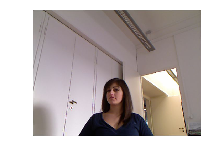

In [33]:
img = open_image(fname)
img.show()

In [34]:
ctr = np.genfromtxt(img2txt_name(fname), skip_header=3); ctr

array([   4.11975,  142.096  , 1054.6    ])

In [35]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2,c1])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)
## here we create image points
## these are coordinates
def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

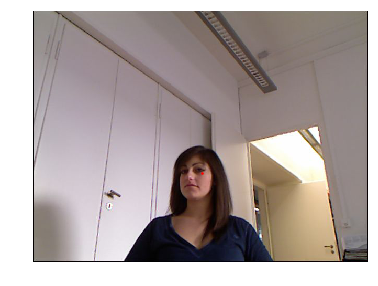

In [36]:
ctr = get_ctr(fname)
img.show(y=get_ip(img, ctr), figsize=(6, 6))

## Creating a dataset

In [37]:
class BiwiDataset(ImageDatasetBase):
    def __init__(self, fns, pts): super().__init__(c=2, x=fns, y=pts)
    def _get_y(self, i, x): return get_ip(x, self.y[i])

In [38]:
data = (ImageFileList.from_folder(path)
        .label_from_func(get_ctr)
        .split_by_valid_func(lambda o: o[0].parent.name=='13')
        .datasets(BiwiDataset)
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch().normalize(imagenet_stats)
       )

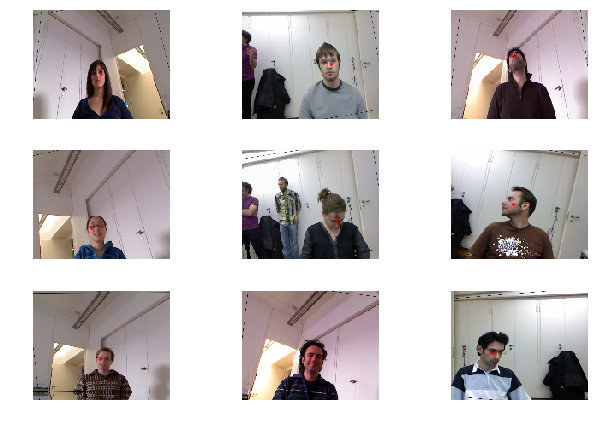

In [39]:
data.show_batch(3, figsize=(9,6))

## Train model

In [40]:
## loss function is that number that says how good is the model
## class entropy: did you predict the correct class and were you confident ? 
##--> yes for classification, not for regression
## mean squared error
learn = create_cnn(data, models.resnet34)
learn.loss_func = MSELossFlat()

RuntimeError: CUDA error: out of memory

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


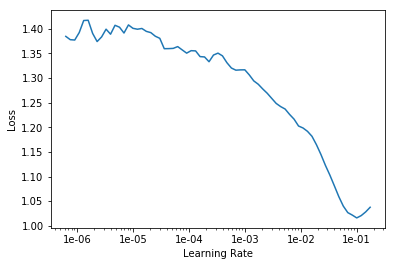

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 2e-2

In [ ]:
learn.fit_one_cycle(5, slice(lr))

Total time: 01:36
epoch  train_loss  valid_loss
1      0.037374    0.009318    (00:19)
2      0.014143    0.003687    (00:18)
3      0.005276    0.005189    (00:19)
4      0.002999    0.004654    (00:19)
5      0.002057    0.001169    (00:19)



In [ ]:
learn.save('stage-1')